In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import os
from matplotlib.cm import get_cmap

In [2]:
# read Data Lorenzo
drive.mount("/content/drive")
os.chdir("drive/My Drive/data")
df = pd.read_csv('ble_data.csv')

Mounted at /content/drive


In [4]:
# Read data Vera
# Mount data from drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/My Drive/ishango/dance/data/ble_data.csv")
# df.head(n=5)

In [74]:
df['vehicle_id'].nunique()

7308

In [75]:
## data cleaning

# remove duplicates
df = df.drop_duplicates()

# drop NAs in mileage
df = df.dropna(subset=['total_mileage'])

# sort based on time
df = df.sort_values(by='occurred_at_time')

# adjust datatype
df['occurred_at_time'] = pd.to_datetime(df['occurred_at_time'])

In [76]:
df['vehicle_id'].nunique()

7308

In [77]:
from numpy.ma.extras import isin
# take a sample of bikes
vehicles = ['382d4727-6119-4391-adc0-ac5500c489b6',
            'bc3412f7-37a8-4676-8043-53f4a1bb316a',
            'ca4c5d0d-0d08-4189-b8ee-e8cd4d337422',
            '4cf2b02f-5631-4441-a93d-a1f2d59c83bf',
            '00e10c80-c79a-4e5e-b5ee-73de58bb7091',
            '010df9b5-ecea-445a-9cc5-01fa71edcce3',
            '00c8acbf-39fe-44dc-bdc5-257e189c4a58'
            ]

df_sample = df[df['vehicle_id'].isin(vehicles)]

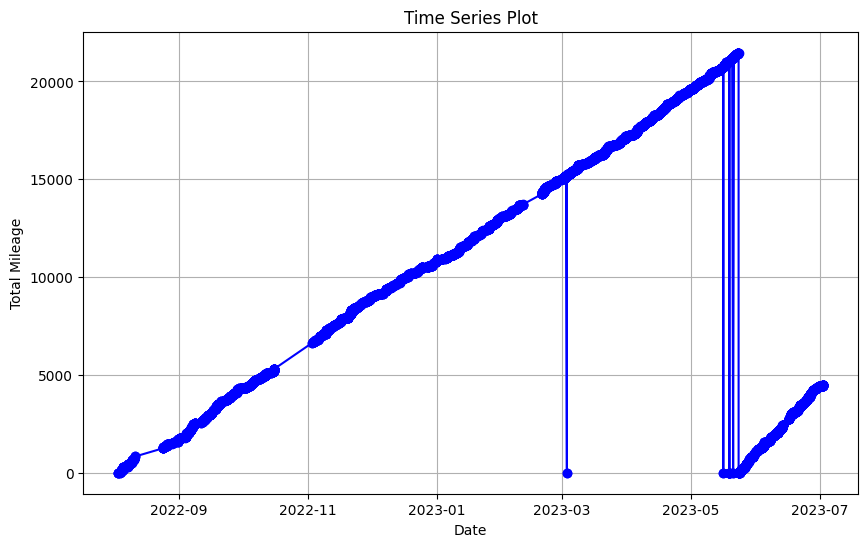

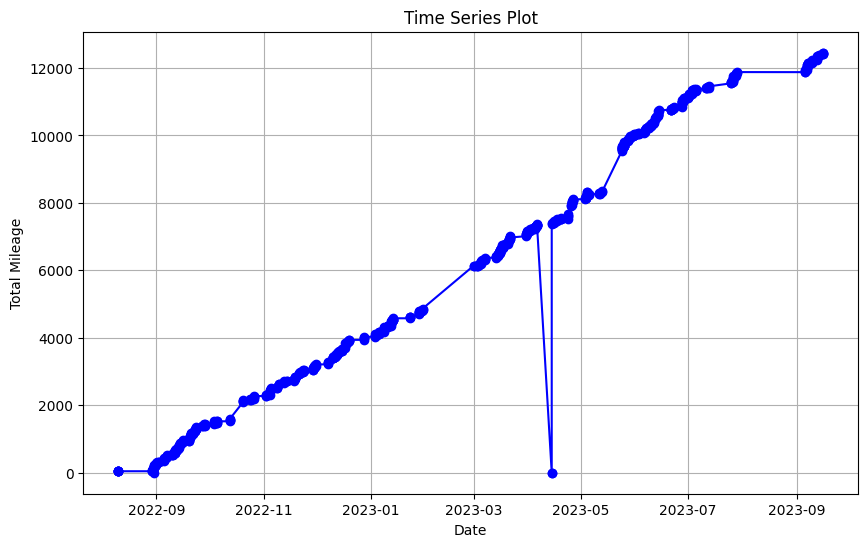

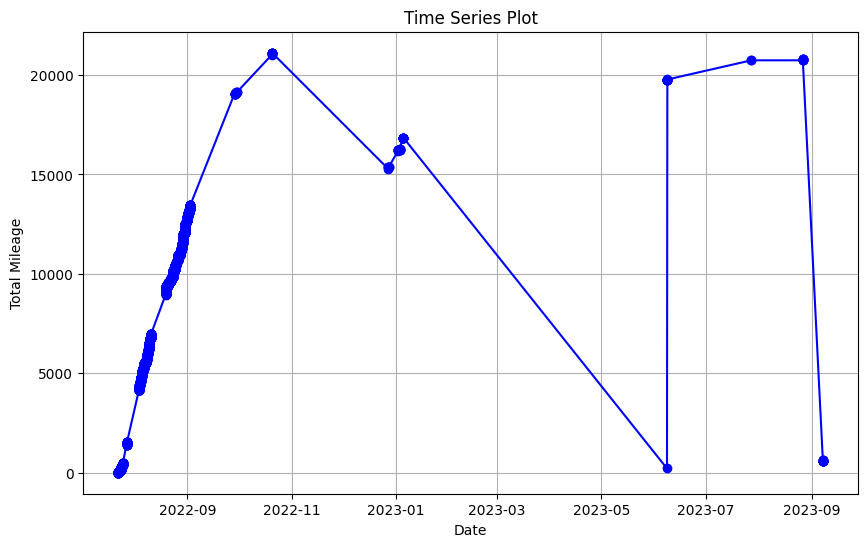

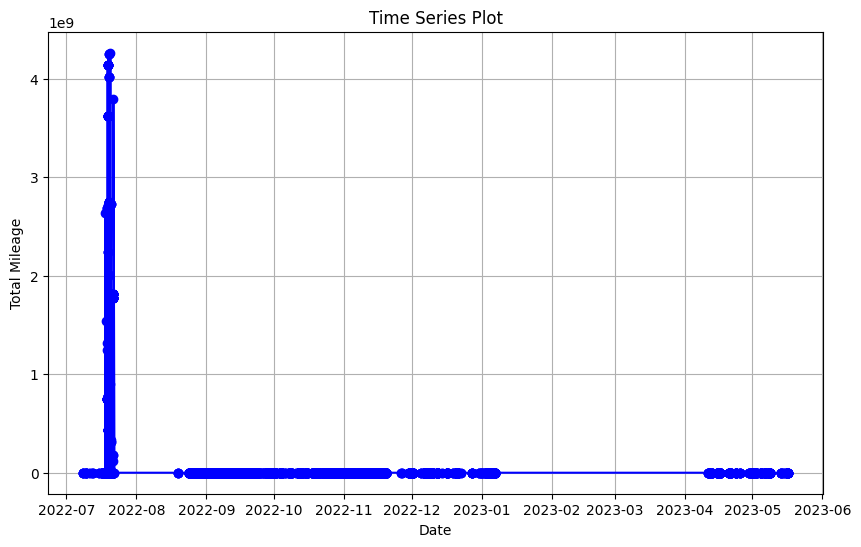

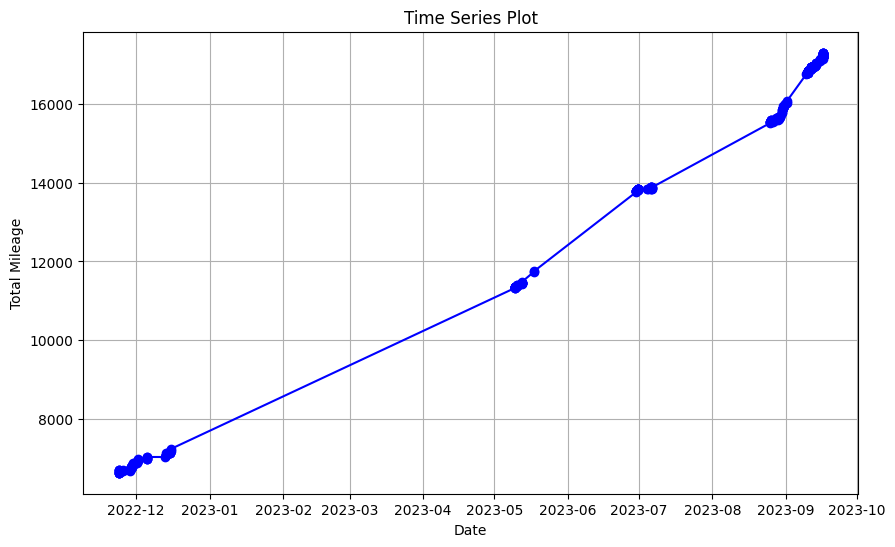

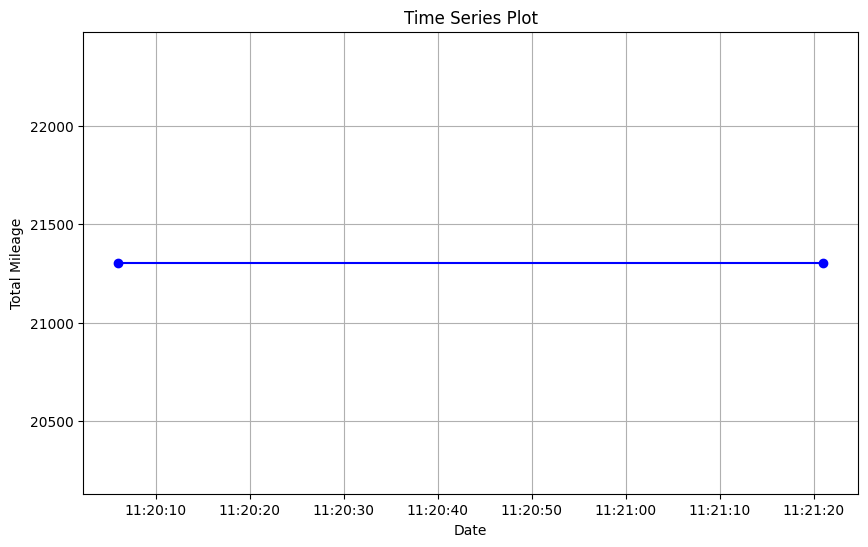

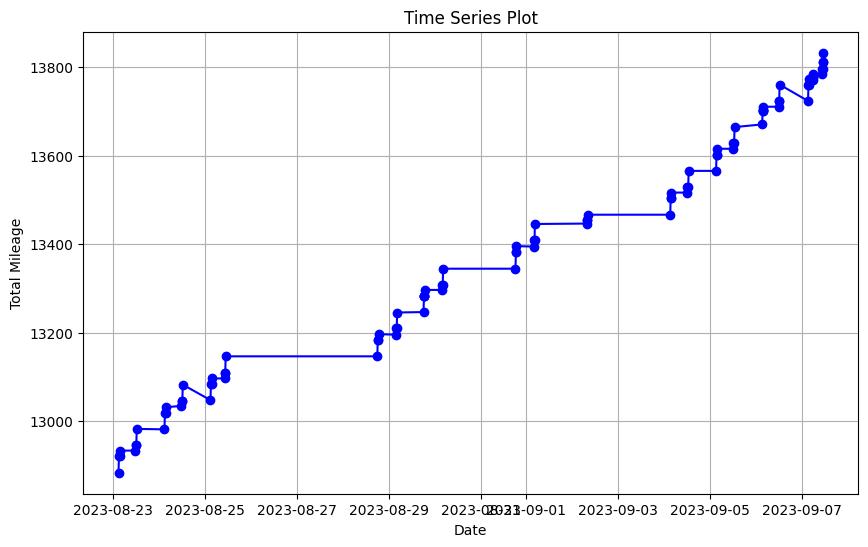

In [78]:
for vehicle in vehicles:
  df_interim = df_sample[df_sample['vehicle_id'] == vehicle]

  # plot mileage vs time:a
  df_interim.set_index('occurred_at_time', inplace=True)
  plt.figure(figsize=(10, 6))
  plt.plot(df_interim.index, df_interim['total_mileage'], marker='o', linestyle='-', color='b')
  plt.title('Time Series Plot')
  plt.xlabel('Date')
  plt.ylabel('Total Mileage')
  plt.grid(True)
  plt.show()

In [79]:
df['ValueCount'] = df.groupby('vehicle_id')['occurred_at_time'].transform('count')
df1 = df[df['ValueCount']>50]
df1.head(2)

,vehicle_id,user_id,total_mileage,versions_mc_firmware,occurred_at_time,app_version,assist_level,battery_cells,battery_error_state,battery_serial_number,...,dance_area,event,hmi_serial_number,os_name,remaining_mileage,versions_battery_firmware,versions_hmi_firmware,versions_hmi_hardware,ValueCount,approximate_month
1008658,2d29f23f-684a-4ef9-9460-bf038a47c3cc,c76a9b98-38ee-48d8-999e-490bed0a8e87,9004.0,DA210815.10,2022-06-21 06:25:06,2022.06.20-2656-prod-release,1.0,NaN,NaN,HT1002MA121220310,...,BERLIN,Vehicle Connected,NaN,Android,336.0,0.2.1.0,1.7.18.0,1.0,1232,2022-06
2802599,2d29f23f-684a-4ef9-9460-bf038a47c3cc,c76a9b98-38ee-48d8-999e-490bed0a8e87,9018.0,DA210815.10,2022-06-21 06:31:01,2022.06.20-2656-prod-release,0.0,NaN,NaN,HT1002MA121220310,...,BERLIN,Vehicle Disconnected,NaN,Android,780.0,0.2.1.0,1.7.18.0,1.0,1232,2022-06


In [80]:
df1['vehicle_id'].nunique()

5435

In [81]:
# at least 2 months of data per bike
result = df1.groupby('vehicle_id')['occurred_at_time'].agg(lambda x: (x.max() - x.min()).days).reset_index()
result.rename(columns={'occurred_at_time': 'DateDifference'}, inplace=True)

# Merge the result back into the original DataFrame
df2 = df1.merge(result, on='vehicle_id')
df2 = df2[df2['DateDifference']>60]
df2.head(2)

,vehicle_id,user_id,total_mileage,versions_mc_firmware,occurred_at_time,app_version,assist_level,battery_cells,battery_error_state,battery_serial_number,...,event,hmi_serial_number,os_name,remaining_mileage,versions_battery_firmware,versions_hmi_firmware,versions_hmi_hardware,ValueCount,approximate_month,DateDifference
0,2d29f23f-684a-4ef9-9460-bf038a47c3cc,c76a9b98-38ee-48d8-999e-490bed0a8e87,9004.0,DA210815.10,2022-06-21 06:25:06,2022.06.20-2656-prod-release,1.0,NaN,NaN,HT1002MA121220310,...,Vehicle Connected,NaN,Android,336.0,0.2.1.0,1.7.18.0,1.0,1232,2022-06,455
1,2d29f23f-684a-4ef9-9460-bf038a47c3cc,c76a9b98-38ee-48d8-999e-490bed0a8e87,9018.0,DA210815.10,2022-06-21 06:31:01,2022.06.20-2656-prod-release,0.0,NaN,NaN,HT1002MA121220310,...,Vehicle Disconnected,NaN,Android,780.0,0.2.1.0,1.7.18.0,1.0,1232,2022-06,455


In [82]:
df2['vehicle_id'].nunique()

4124

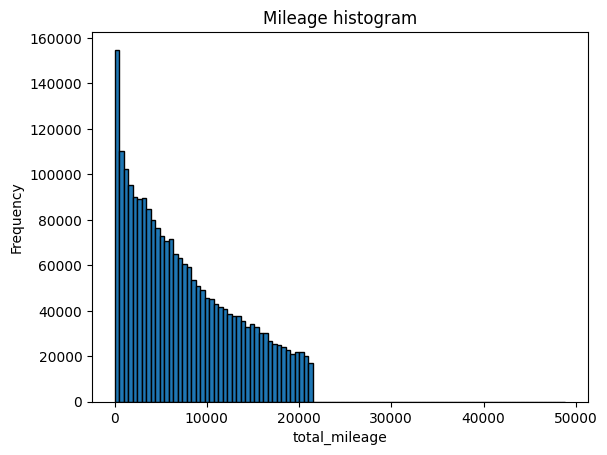

In [83]:
# Customize the histogram
df_min = df2[df2['total_mileage']<100000]
n_bins = 100
plt.hist(df_min['total_mileage'], bins=n_bins, edgecolor='k')



plt.title('Mileage histogram')
plt.xlabel('total_mileage')
plt.ylabel('Frequency')
plt.show()

In [84]:
df2[(df2['total_mileage']<100000)]['total_mileage'].sort_values(ascending=False).head(20)

1887352    48885.0
2490062    23827.0
2160164    21474.0
457738     21474.0
956701     21474.0
1395259    21474.0
1395258    21474.0
1395257    21474.0
2160163    21474.0
2160165    21474.0
2160166    21474.0
2160167    21474.0
2160168    21474.0
636838     21474.0
636839     21474.0
457737     21474.0
332810     21474.0
866334     21474.0
828832     21474.0
828831     21474.0
Name: total_mileage, dtype: float64

<ipython-input-108-306676ce911b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_interim = df3[df2['vehicle_id'] == vehicle]


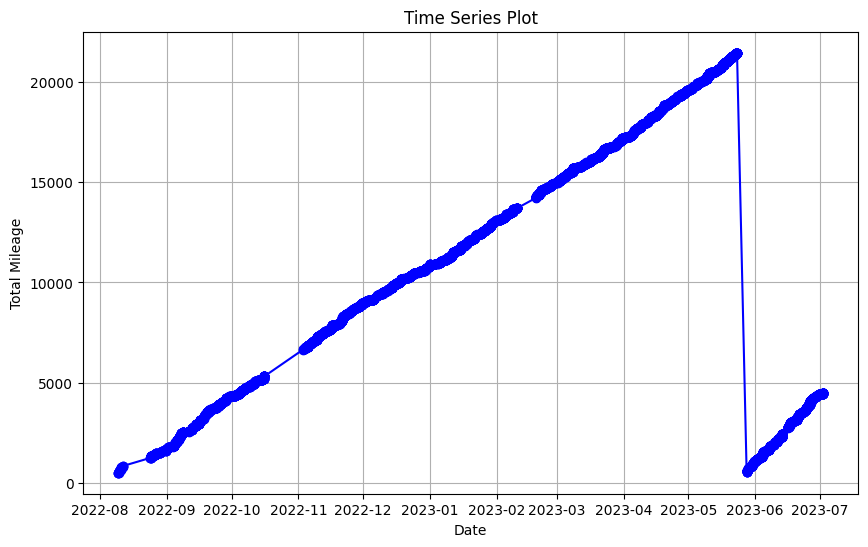

<ipython-input-108-306676ce911b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_interim = df3[df2['vehicle_id'] == vehicle]


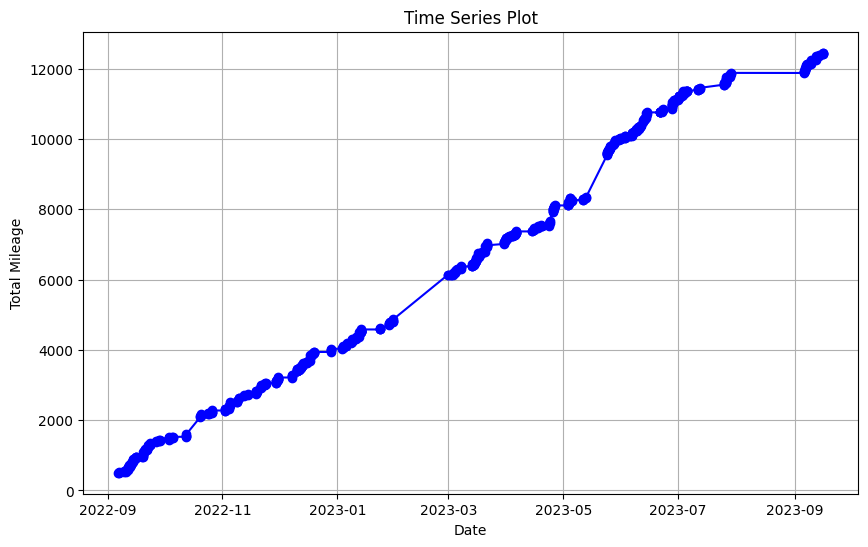

<ipython-input-108-306676ce911b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_interim = df3[df2['vehicle_id'] == vehicle]


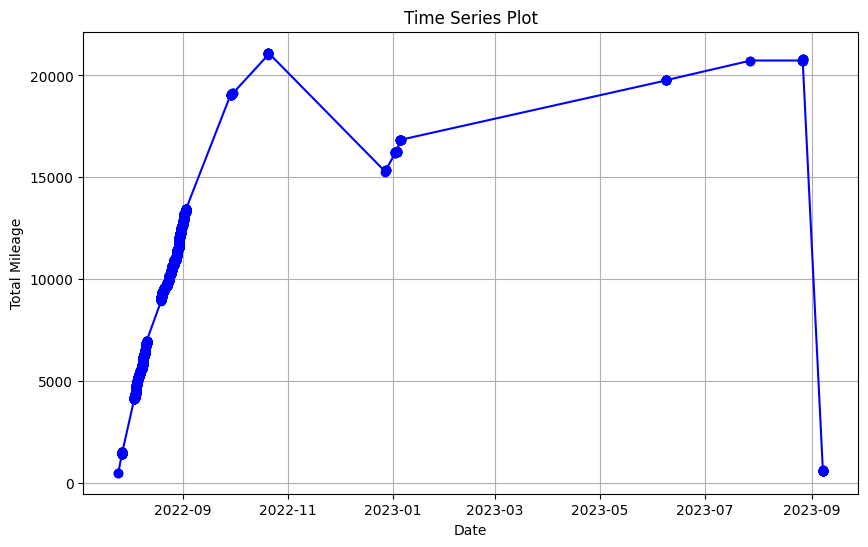

<ipython-input-108-306676ce911b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_interim = df3[df2['vehicle_id'] == vehicle]


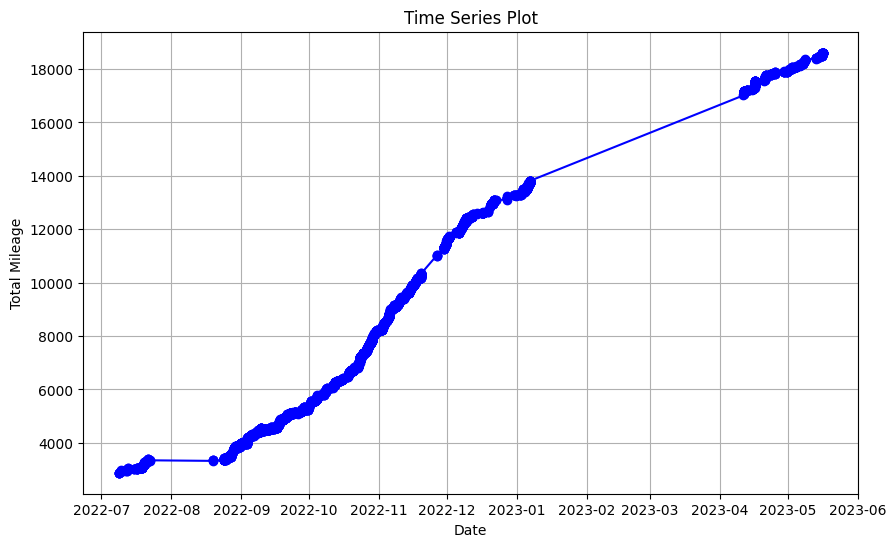

<ipython-input-108-306676ce911b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_interim = df3[df2['vehicle_id'] == vehicle]


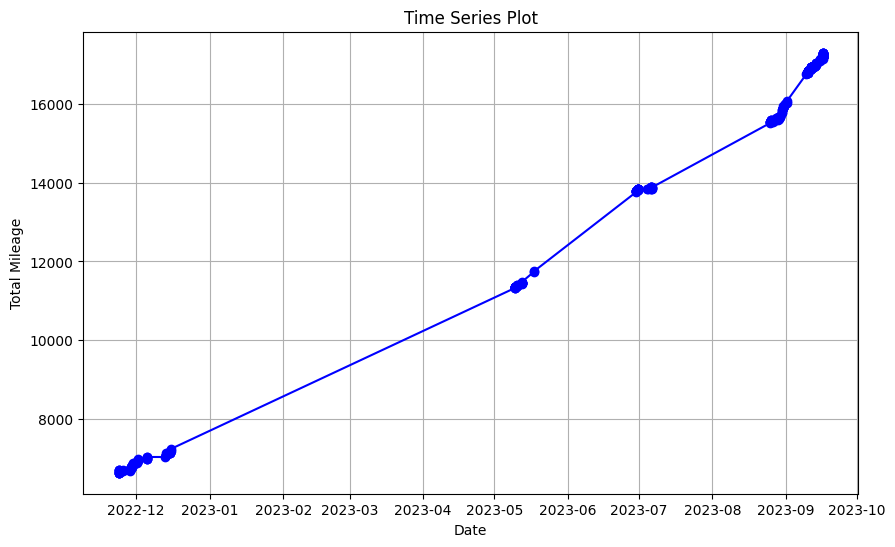

<ipython-input-108-306676ce911b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_interim = df3[df2['vehicle_id'] == vehicle]


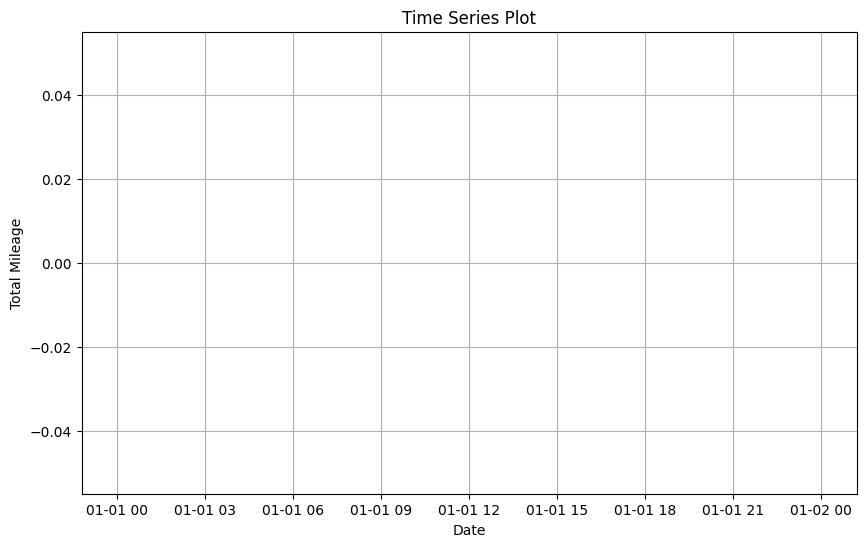

<ipython-input-108-306676ce911b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_interim = df3[df2['vehicle_id'] == vehicle]


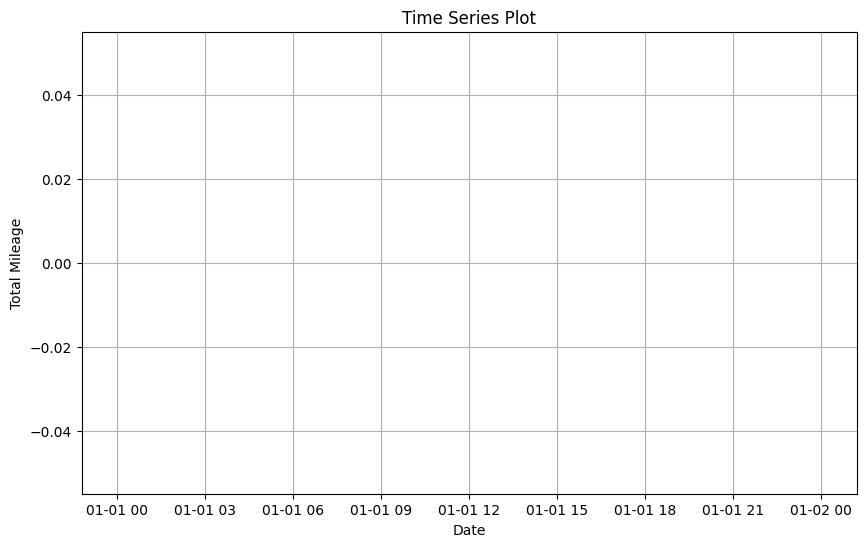

In [108]:
# eliminate outliers drop
## looks like no bike log mileage > 21500
df3 = df2[(df2['total_mileage']>500) & (df2['total_mileage']<21500)]

for vehicle in vehicles:
  df_interim = df3[df2['vehicle_id'] == vehicle]

  # plot mileage vs time:a
  df_interim.set_index('occurred_at_time', inplace=True)
  plt.figure(figsize=(10, 6))
  plt.plot(df_interim.index, df_interim['total_mileage'], marker='o', linestyle='-', color='b')
  plt.title('Time Series Plot')
  plt.xlabel('Date')
  plt.ylabel('Total Mileage')
  plt.grid(True)
  plt.show()

<ipython-input-109-6fb4b911e64b>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20', len(unique_group_types))
<ipython-input-109-6fb4b911e64b>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20', len(unique_group_types))


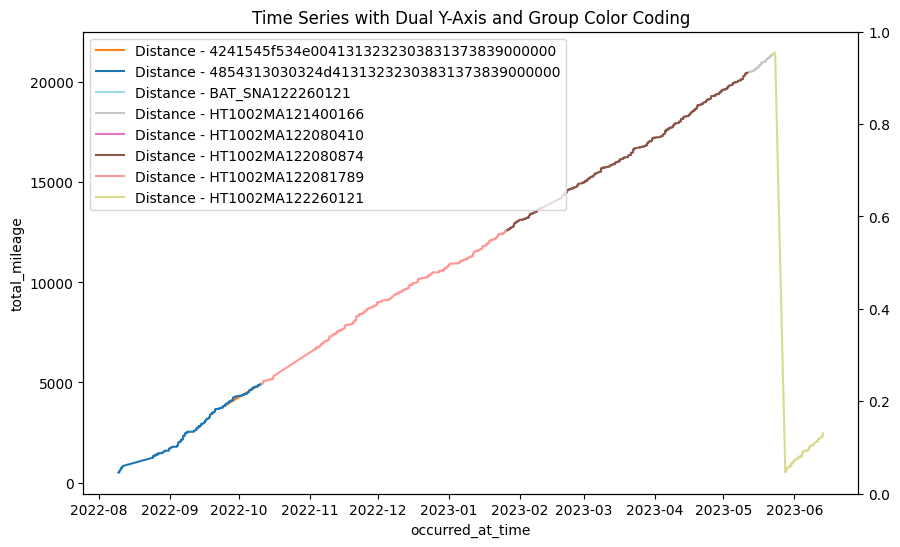

In [109]:
# Sample DataFrame
df_test = df3[df3['vehicle_id'] == '382d4727-6119-4391-adc0-ac5500c489b6']


# Create a figure and two subplots sharing the same x-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Get unique values in the 'group_type' column
unique_group_types = df_test['battery_serial_number'].unique()

# Generate a color map based on the number of unique values
cmap = get_cmap('tab20', len(unique_group_types))

# Generate a color map based on the number of unique values
cmap = get_cmap('tab20', len(unique_group_types))

# Create a color mapping dictionary
color_map = {group_type: cmap(i) for i, group_type in enumerate(unique_group_types)}

for group_type, group_df in df_test.groupby('battery_serial_number'):
    ax1.plot(group_df['occurred_at_time'], group_df['total_mileage'], color=color_map[group_type], label=f'Distance - {group_type}')


ax1.set_xlabel('occurred_at_time')
ax1.set_ylabel('total_mileage')
ax1.tick_params(axis='y')

# Create a twin y-axis on the right side
ax2 = ax1.twinx()

# # Plot the 'money' data on the right y-axis (ax2) with color mapping
# for group_type, group_df in df.groupby('group_type'):
#     ax2.plot(group_df['date'], group_df['money'], color=color_map[group_type], label=f'Money - {group_type}')

# ax2.set_ylabel('Money')
# ax2.tick_params(axis='y')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines , labels, loc='upper left')

# Show the plot
plt.title('Time Series with Dual Y-Axis and Group Color Coding')
plt.show()

In [110]:
# average number of battery per bike
average_unique_labels = df3.groupby('vehicle_id')['battery_serial_number'].nunique().mean()
average_unique_labels

13.957948468643655

In [111]:
dff_battery = df3.groupby('vehicle_id')['battery_serial_number'].nunique()
dff_battery

vehicle_id
0000a2c8-03b6-4b57-a74b-851cb77c598d     2
00214cc8-4fc8-4dab-b5a8-4b9063f145ec     5
003c3bdc-53fd-4889-acdf-f2840cf9218b     1
005022ad-645d-4865-8a12-c279e0a41dd7     2
0060548b-8471-445a-ae1d-69a626ae0b83     5
                                        ..
ffb3f426-1ea1-41c1-94c8-72ac78909362    15
ffbdabd3-4684-4a94-8e84-73743aaf61bf     5
ffc90382-e520-4df9-a9fb-7a4c33b9bb69     1
ffdfb990-7e38-4c2d-87eb-081941e2200d     1
ffe4c2ad-5fbb-49a2-a26f-71d1521de21d    59
Name: battery_serial_number, Length: 4114, dtype: int64

In [112]:
dff_battery.head()

vehicle_id
0000a2c8-03b6-4b57-a74b-851cb77c598d    2
00214cc8-4fc8-4dab-b5a8-4b9063f145ec    5
003c3bdc-53fd-4889-acdf-f2840cf9218b    1
005022ad-645d-4865-8a12-c279e0a41dd7    2
0060548b-8471-445a-ae1d-69a626ae0b83    5
Name: battery_serial_number, dtype: int64

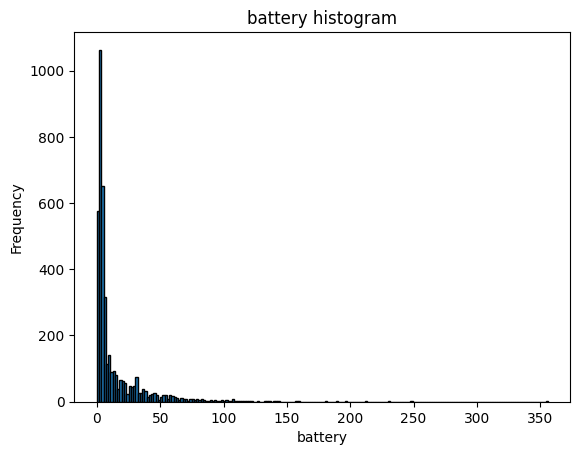

In [113]:
n_bins = 200
plt.hist(dff_battery, bins=n_bins, edgecolor='k')

plt.title('battery histogram')
plt.xlabel('battery')
plt.ylabel('Frequency')
plt.show()

In [114]:
dff_battery

vehicle_id
0000a2c8-03b6-4b57-a74b-851cb77c598d     2
00214cc8-4fc8-4dab-b5a8-4b9063f145ec     5
003c3bdc-53fd-4889-acdf-f2840cf9218b     1
005022ad-645d-4865-8a12-c279e0a41dd7     2
0060548b-8471-445a-ae1d-69a626ae0b83     5
                                        ..
ffb3f426-1ea1-41c1-94c8-72ac78909362    15
ffbdabd3-4684-4a94-8e84-73743aaf61bf     5
ffc90382-e520-4df9-a9fb-7a4c33b9bb69     1
ffdfb990-7e38-4c2d-87eb-081941e2200d     1
ffe4c2ad-5fbb-49a2-a26f-71d1521de21d    59
Name: battery_serial_number, Length: 4114, dtype: int64

In [115]:
dff_battery.sort_values().tail(50)

vehicle_id
2397d4af-9229-4b72-8bdf-864f85c3949d    103
1c0578c0-4775-48c1-a376-08cd54e9bba3    103
1eac444e-e0ac-46ab-9545-be92b292cb0a    104
ce4779cb-1ef9-4d7b-ab29-60d03a7ce74e    104
c4757542-fbda-424b-8671-f7bfd493124c    106
5bf64a7a-13fb-47ae-bc7b-7f3199828ccb    106
cca7018b-3017-4a53-ab3d-13aa7ea91ea0    107
d0e35e80-6a75-4352-86ae-ac7279fbbfd1    107
599fcdfa-c7a5-405d-b33c-824e2aa68045    107
f0861b0a-79ad-4676-95e3-cbf0d1e39091    108
37bacfe4-bb38-4d71-8ac3-d732acfad8d4    108
9e249e15-99be-458d-a23a-2a8cf5730740    108
7199d6eb-1615-405e-8ae7-2b7fc158ebc1    108
ac3896af-e518-40ec-a383-8572c35ccc9c    109
9b6c799a-c6fa-4492-9198-a690b81b19dd    109
10608af4-8645-4bdc-9169-b78c7036fa27    111
7295d547-1b92-4424-9eac-23529555c867    112
0cd97ed6-e632-442c-bf34-d74d86fc9092    112
f6789f89-b3ff-4bd5-99bd-be473a18986e    113
586b56fb-6eba-4811-bfda-7df204fe8d0a    114
6422031b-a2e8-449d-a99f-15b6983188f1    115
e3a4e8a0-280d-438a-acb0-653fc55e2944    117
ff7b190f-2783-450d-a6

In [116]:
set(df3[df3['vehicle_id']=='d0e35e80-6a75-4352-86ae-ac7279fbbfd1']['battery_serial_number'])

{'02MA32233069LONG 123',
 'HT1002MA122330228',
 'HT1002MA122330228HT1002MA122330228',
 'HT1002MA122330228HT1002MA122330228HT1002MA122330228',
 'HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228',
 'HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228',
 'HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228',
 'HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228',
 'HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228',
 'HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228',
 'HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA122330228HT1002MA12

In [117]:
set(df3[df3['vehicle_id']=='ad5c078e-1c80-405c-b55d-03ffdaab0fca']['battery_serial_number'])

{nan}

In [118]:
df3['vehicle_id'].nunique()

4114

In [119]:
df3.columns

Index(['vehicle_id', 'user_id', 'total_mileage', 'versions_mc_firmware',
       'occurred_at_time', 'app_version', 'assist_level', 'battery_cells',
       'battery_error_state', 'battery_serial_number',
       'battery_state_battery_soc', 'battery_state_battery_soh',
       'battery_state_cell_temp_1', 'battery_state_cell_temp_2',
       'battery_state_chg_temp', 'battery_state_dsg_temp',
       'battery_state_full_capacity', 'battery_state_pack_voltage',
       'battery_state_pre_start_temp', 'battery_state_real_time_current',
       'battery_state_remaining_capacity', 'dance_area', 'event',
       'hmi_serial_number', 'os_name', 'remaining_mileage',
       'versions_battery_firmware', 'versions_hmi_firmware',
       'versions_hmi_hardware', 'ValueCount', 'approximate_month',
       'DateDifference'],
      dtype='object')

In [120]:
#df3['approximate_month'] = df3['occurred_at_time'].dt.to_period('M')
df3_temp = df3[df3['total_mileage']>20000][['vehicle_id', 'occurred_at_time']].drop_duplicates()

result3 = df3_temp.groupby('vehicle_id')['occurred_at_time'].agg(lambda x: (x.max() - x.min()).days).reset_index()
result3.rename(columns={'occurred_at_time': 'DateDifference'}, inplace=True)

result3.head()
# # Merge the result back into the original DataFrame
# df_all = df3_temp.merge(result3, on='vehicle_id')
# #df2 = df2[df2['DateDifference']>60]
# df_all.head(2)

,vehicle_id,DateDifference
0,00214cc8-4fc8-4dab-b5a8-4b9063f145ec,11
1,005022ad-645d-4865-8a12-c279e0a41dd7,0
2,00ada300-2b79-45f6-8e67-eb72f5786f37,8
3,00c4c5f6-91b6-4c91-a073-d2d2c6c83932,0
4,00f6ac6a-d41b-4306-9e5d-c92bee5a3a6c,2


In [121]:
result3.sort_values(by='DateDifference', ascending=False).head(10)


,vehicle_id,DateDifference
575,d090b561-01a5-41cb-bab7-cc1ecb88ecb8,369
315,78968d8d-6e17-40ef-92b1-520b93e4e68a,349
106,28200b94-d2c5-4783-b3ac-423955266a10,322
554,ca4c5d0d-0d08-4189-b8ee-e8cd4d337422,310
450,a76471c6-713b-44b0-83aa-addd04f703b1,302
502,ba462f3c-6946-411a-85df-289f08868687,292
13,02aa22b0-5e02-4cd7-8a55-dc0a96579bbe,282
101,25cde976-7e16-42a5-ab9a-222308ca4bb3,280
168,41cb8b30-9d0c-45ad-a121-d8e89be8bcbe,260
196,4be0f7b5-5836-4460-981f-38f09e7b2c24,213


In [125]:
vehicles2 = list(result3.sort_values(by='DateDifference', ascending=False).head(50)['vehicle_id'])
vehicles2

['d090b561-01a5-41cb-bab7-cc1ecb88ecb8',
 '78968d8d-6e17-40ef-92b1-520b93e4e68a',
 '28200b94-d2c5-4783-b3ac-423955266a10',
 'ca4c5d0d-0d08-4189-b8ee-e8cd4d337422',
 'a76471c6-713b-44b0-83aa-addd04f703b1',
 'ba462f3c-6946-411a-85df-289f08868687',
 '02aa22b0-5e02-4cd7-8a55-dc0a96579bbe',
 '25cde976-7e16-42a5-ab9a-222308ca4bb3',
 '41cb8b30-9d0c-45ad-a121-d8e89be8bcbe',
 '4be0f7b5-5836-4460-981f-38f09e7b2c24',
 'ac226494-0672-4961-a5a5-1b9a130d01f5',
 '7ee276ef-2767-44ee-8e53-1e2079921c9a',
 '7d3a9ccd-97ea-4e7b-8bfe-cb9ea73adbd9',
 '7405e9b6-1e65-4ad3-b416-ae8d69a6741d',
 '8ab652f7-b3ca-47b9-8067-bf77830e28fc',
 '12a6a2cc-2cd9-42f0-9308-674694cc42f9',
 '50489aa8-3292-4434-8d23-63fa89c32946',
 '9f7ecf6d-3bf0-486d-b784-d1abac21ad57',
 '5174fec2-3faa-4d17-8ce4-c81c842e5e23',
 '9263c90c-aacb-42d4-b12f-73031b4a007c',
 'ec03aced-b756-4b4d-9b7b-c5be6de96483',
 'a14025ba-643d-468f-a9bb-d3c774336d84',
 '63b5fcb1-2224-4720-9c86-2347bbc92efe',
 'ea365e98-ffda-419c-b1e8-291b73f09644',
 '1dd1b362-c71d-

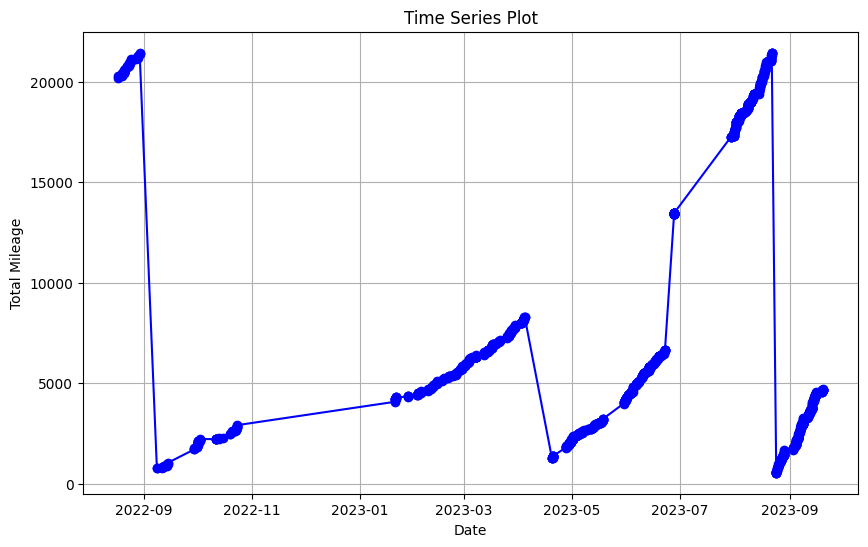

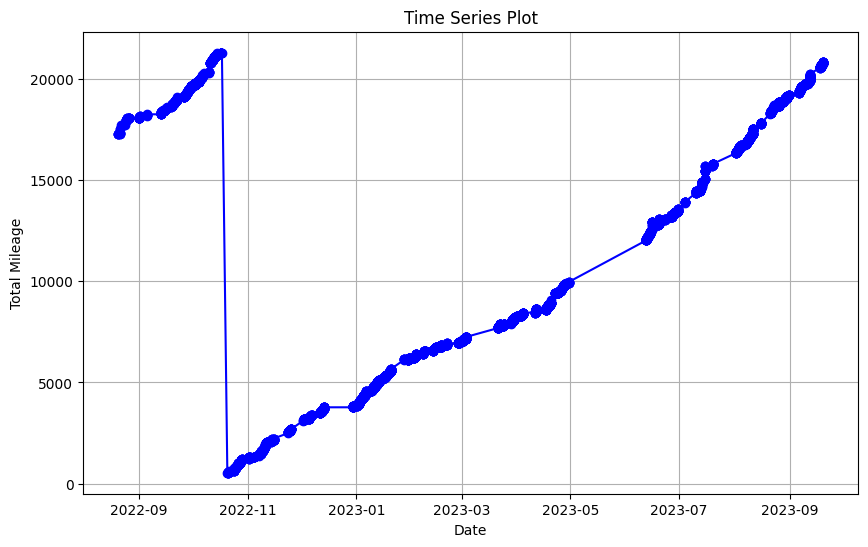

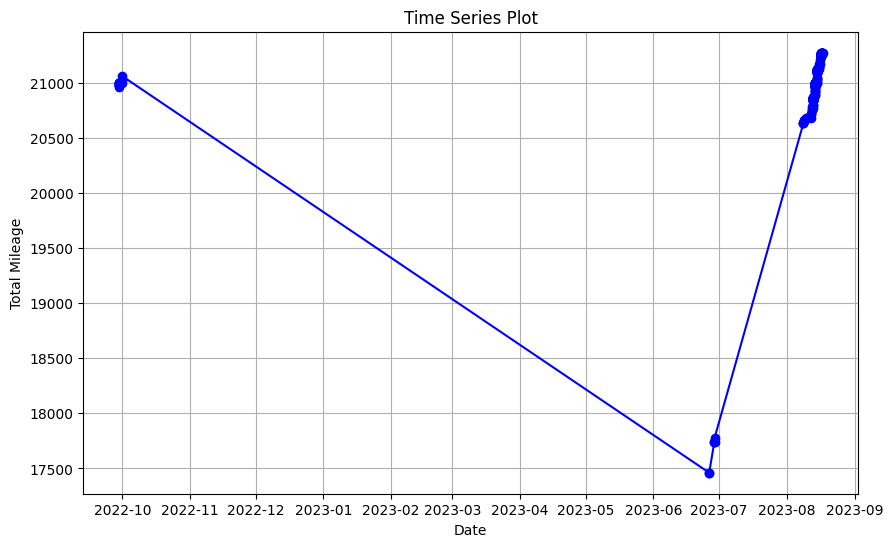

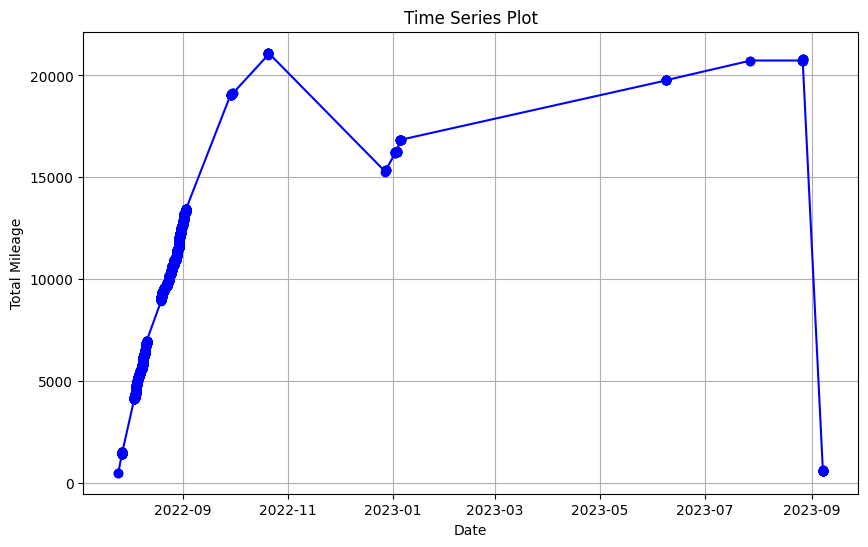

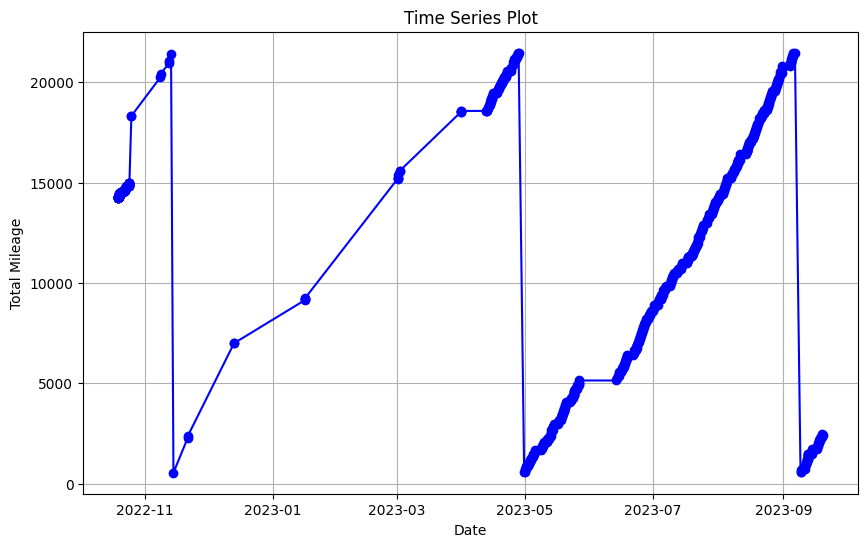

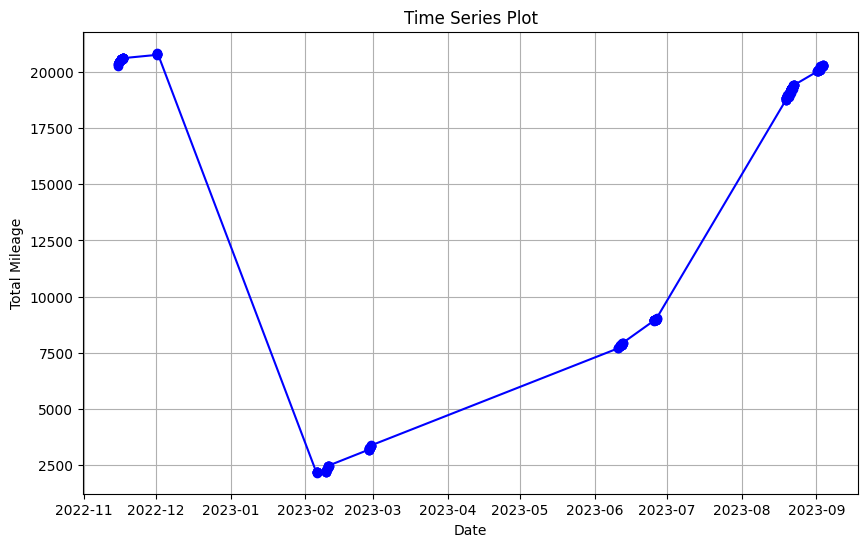

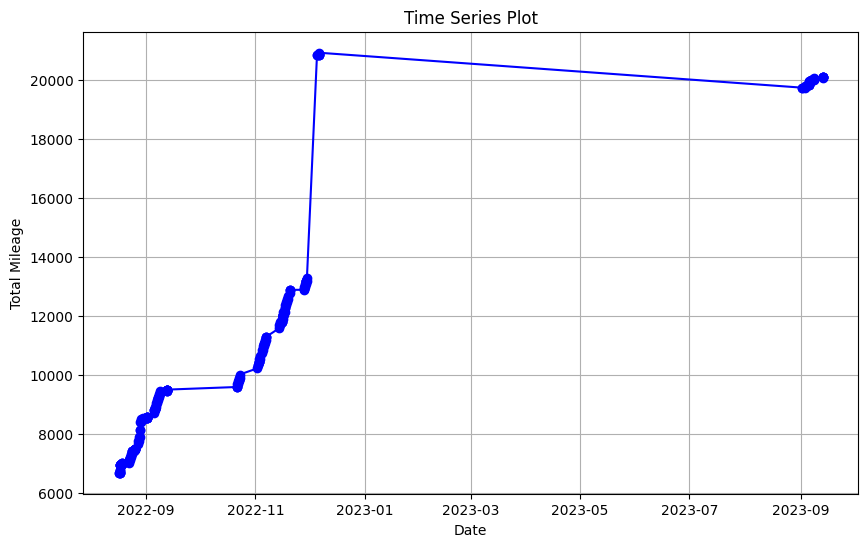

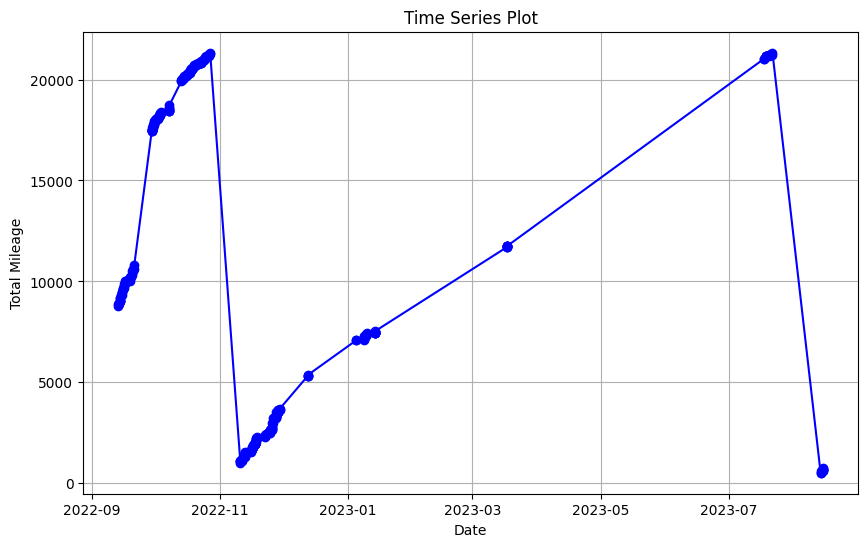

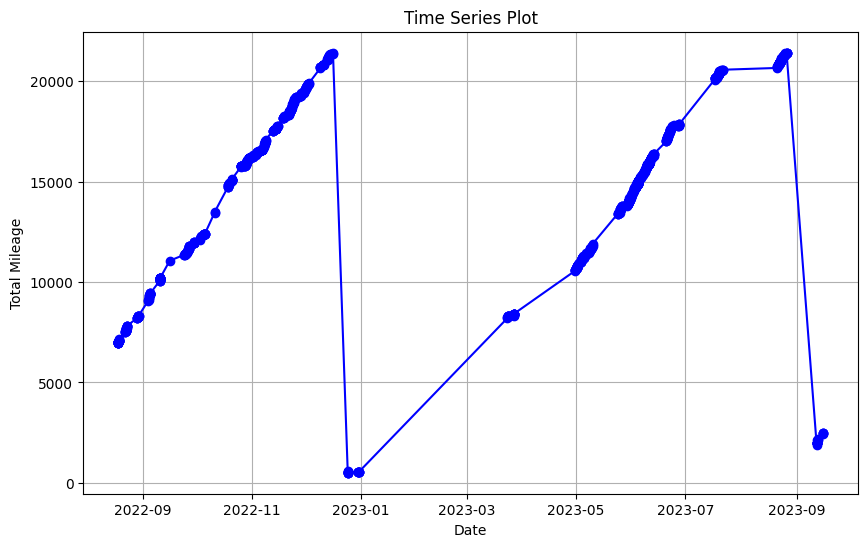

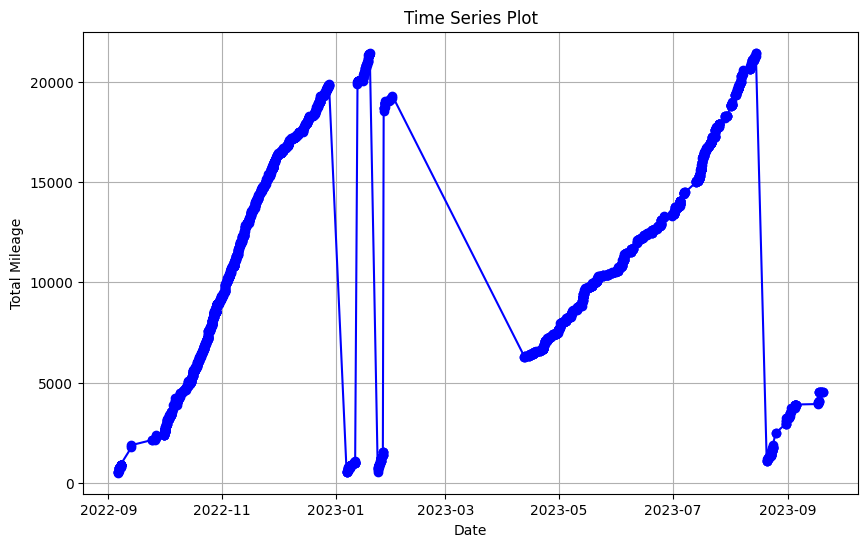

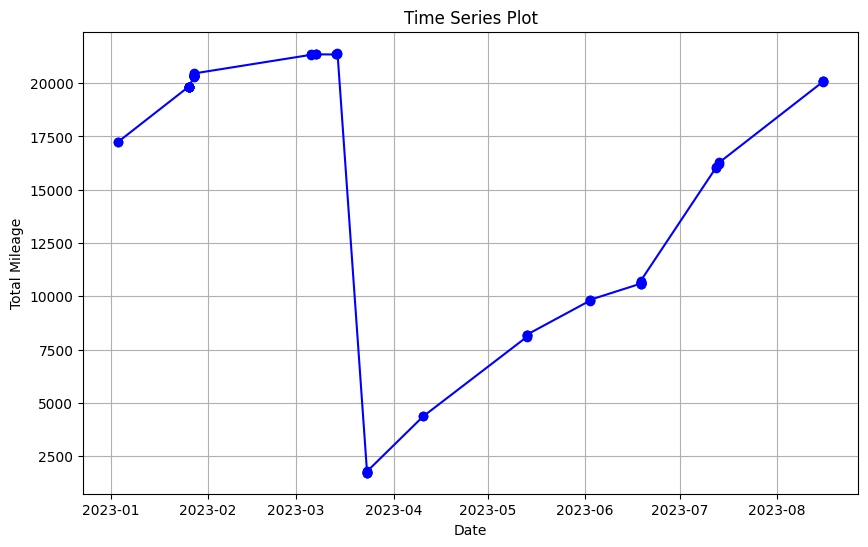

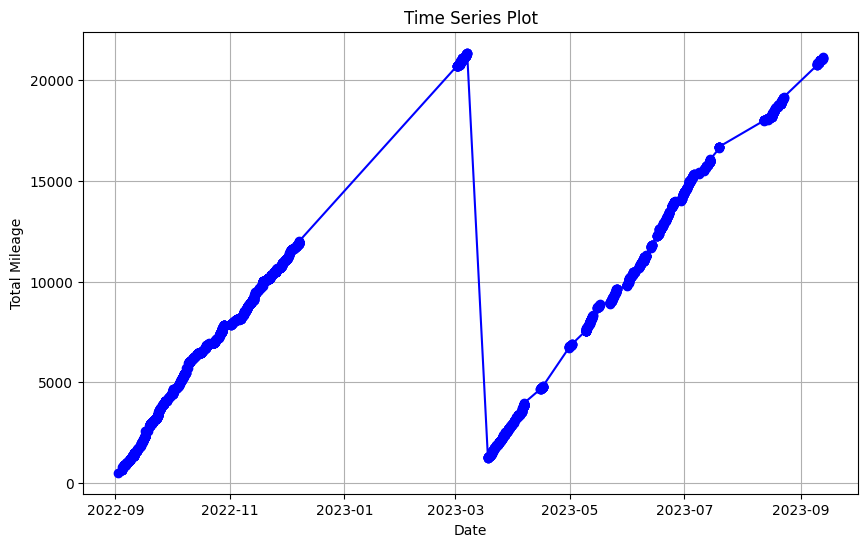

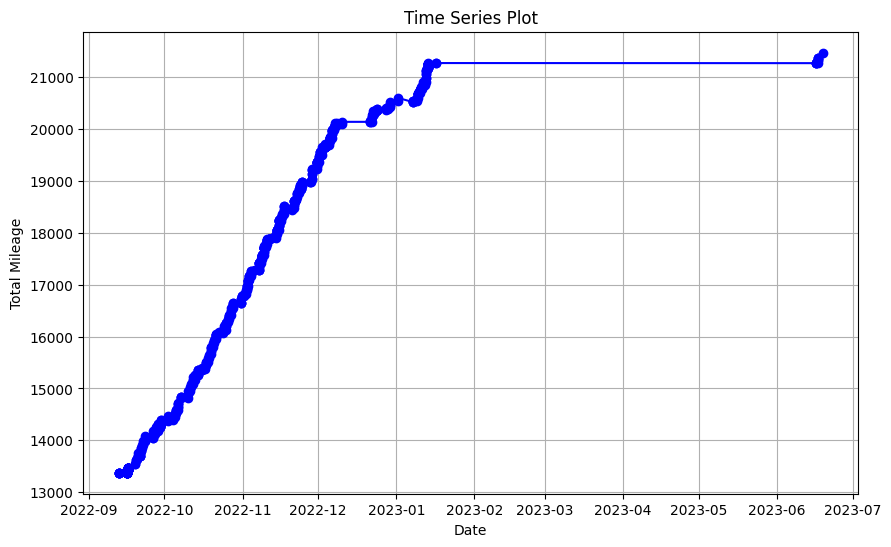

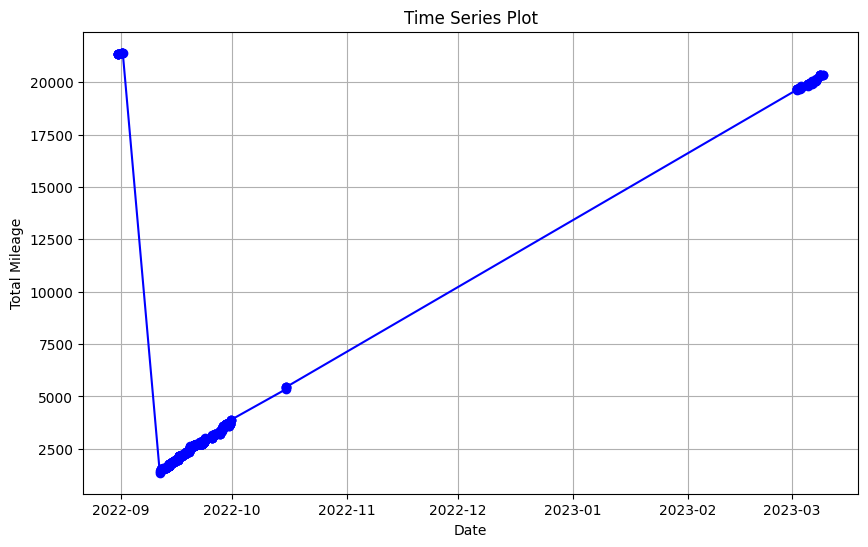

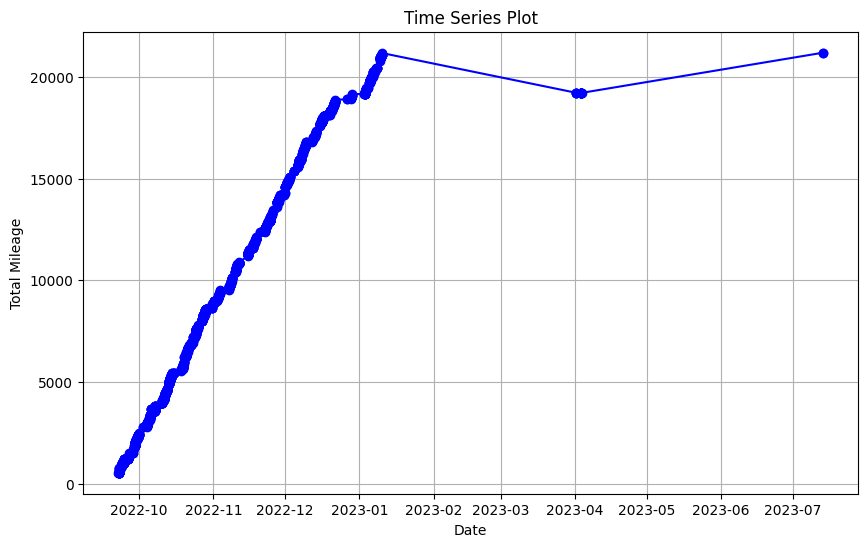

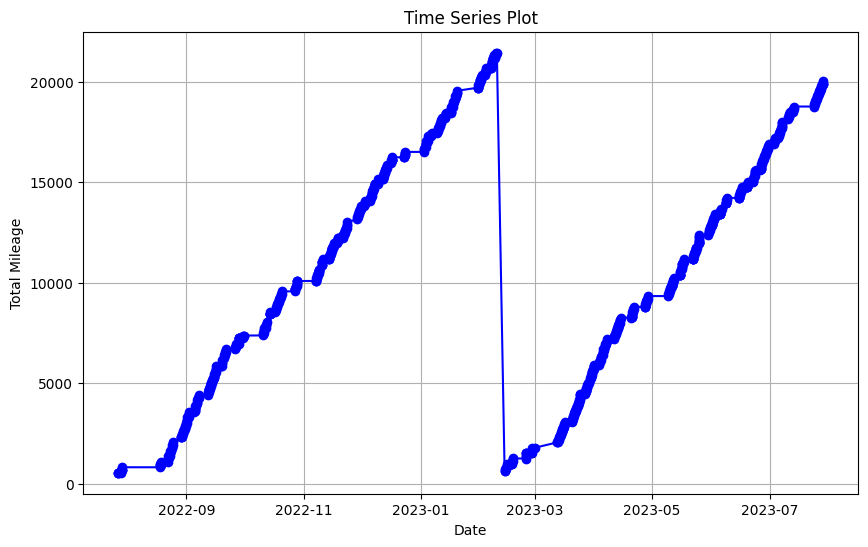

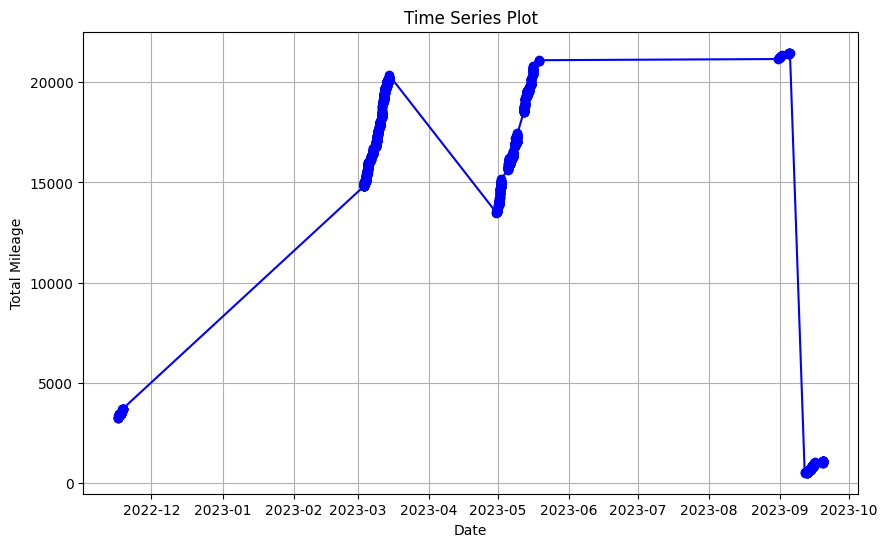

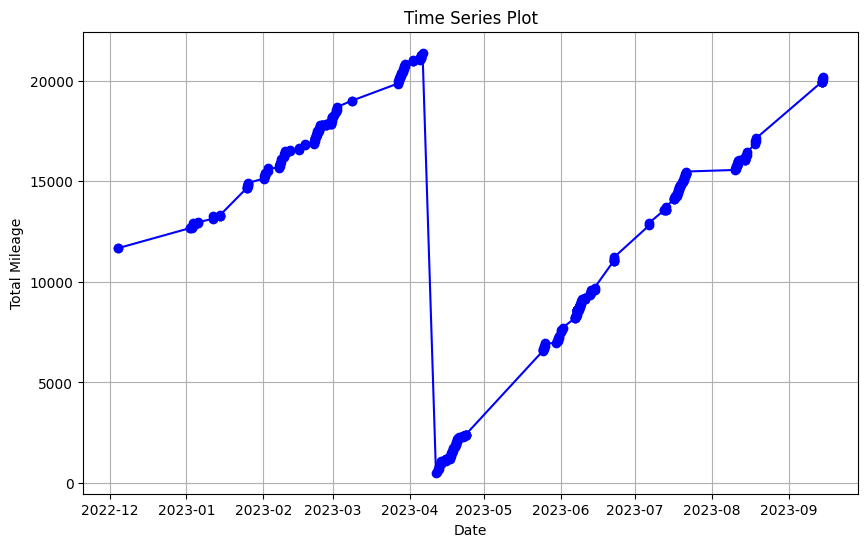

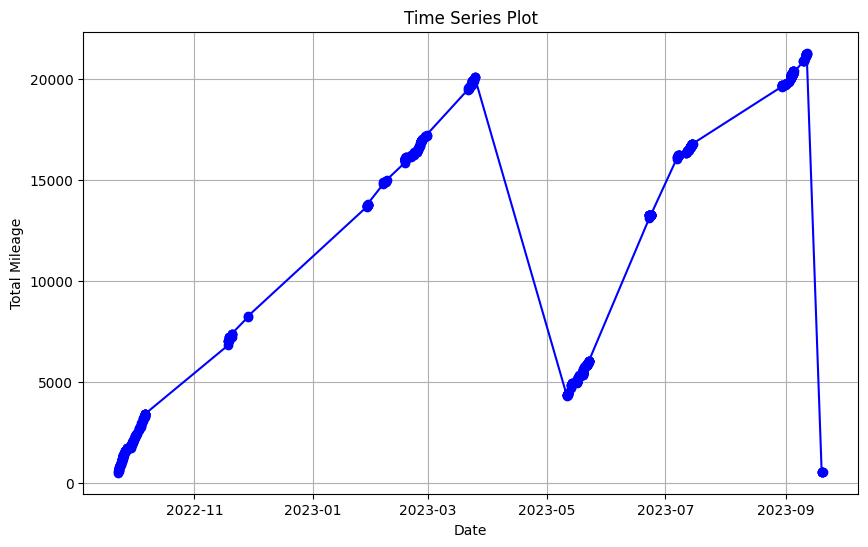

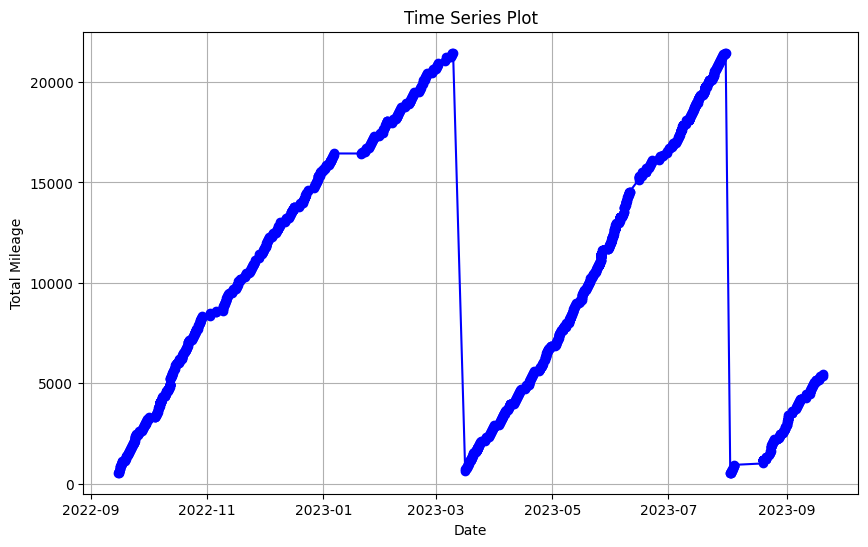

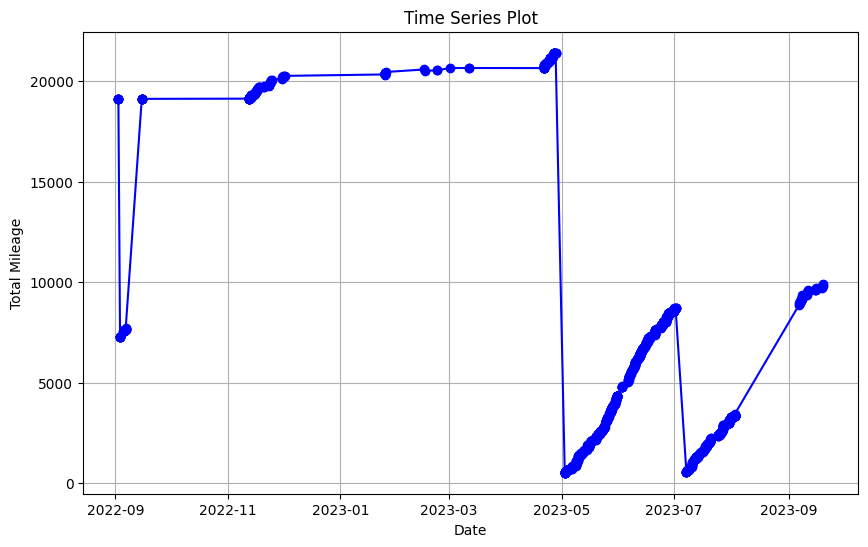

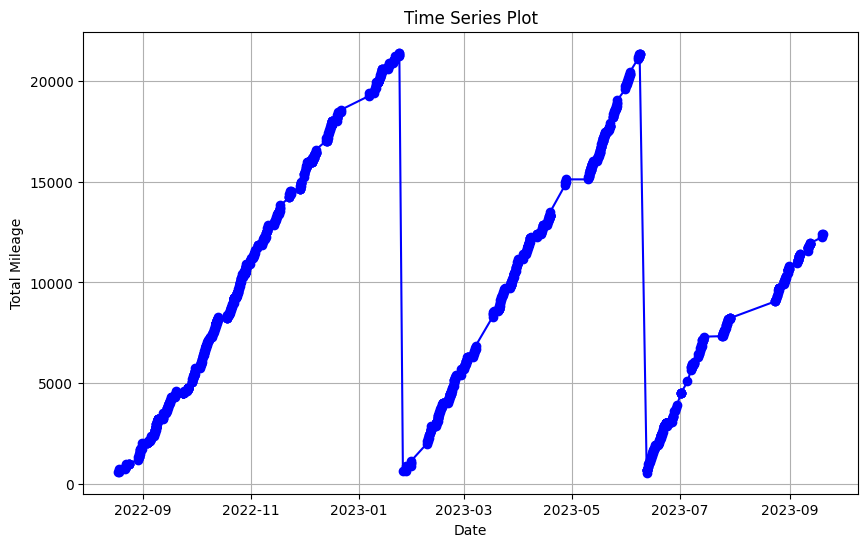

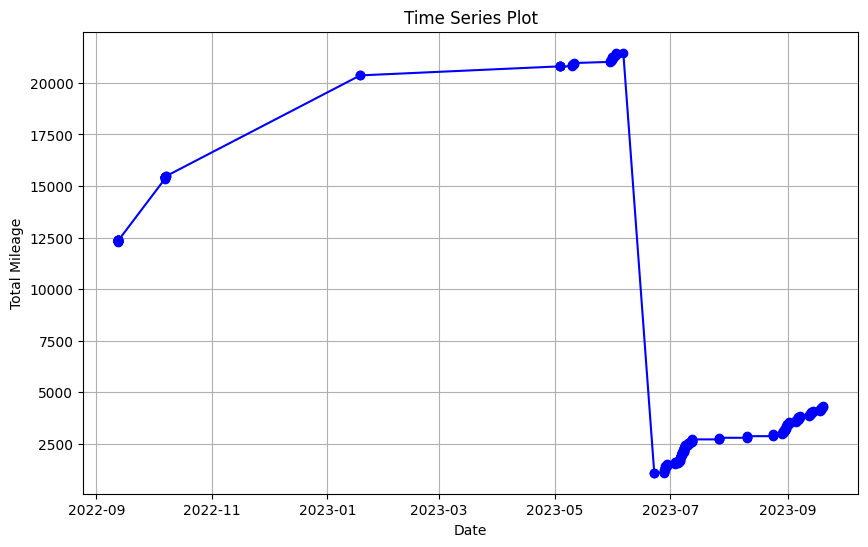

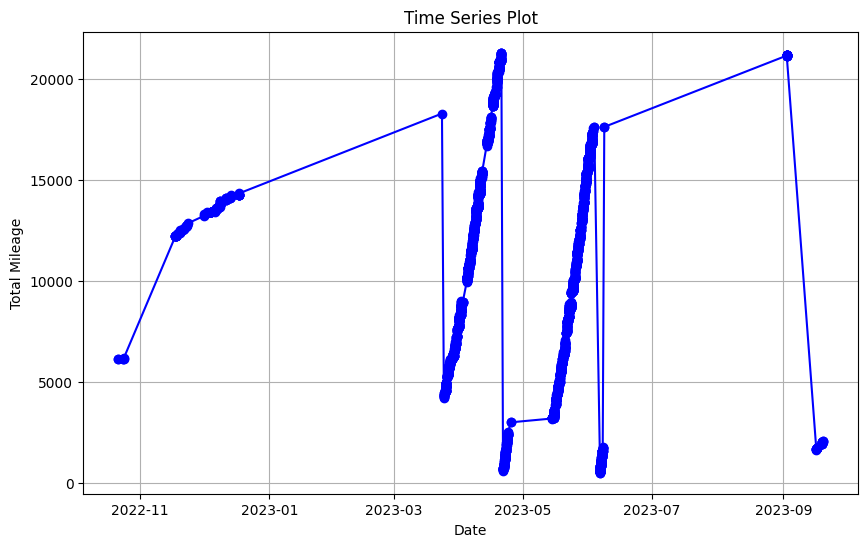

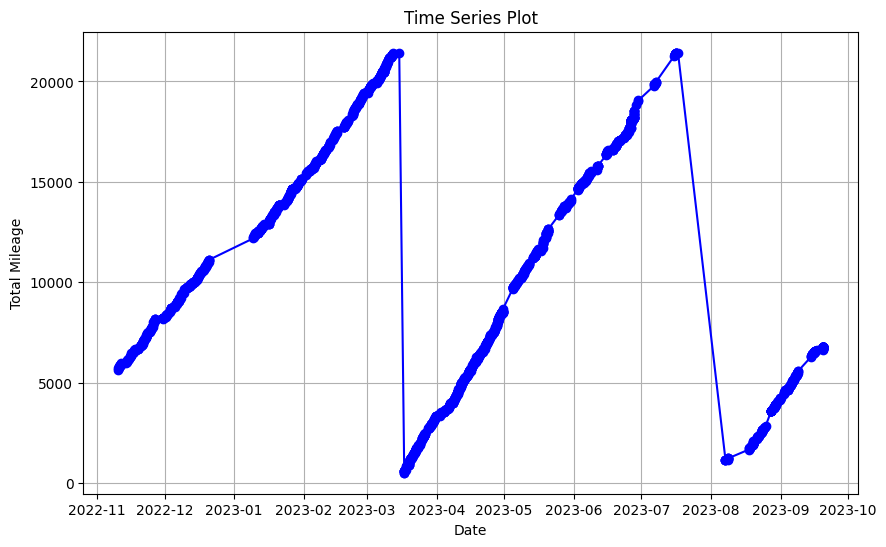

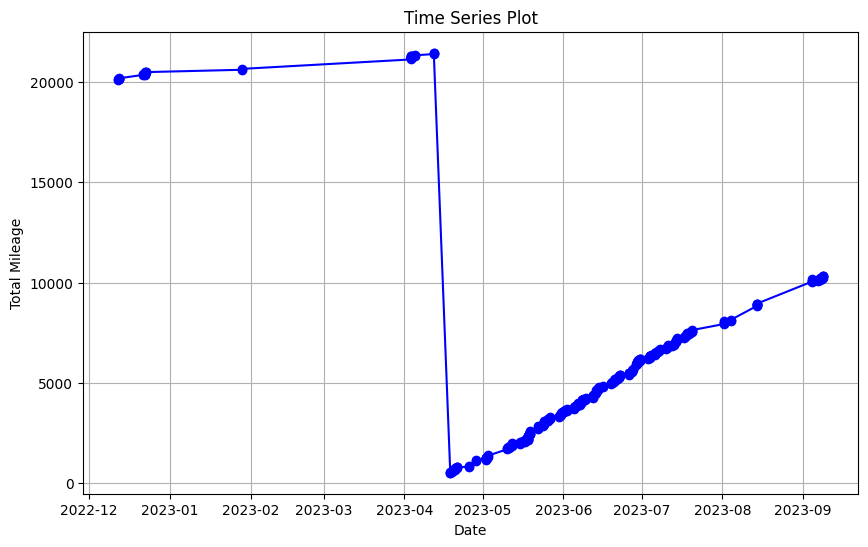

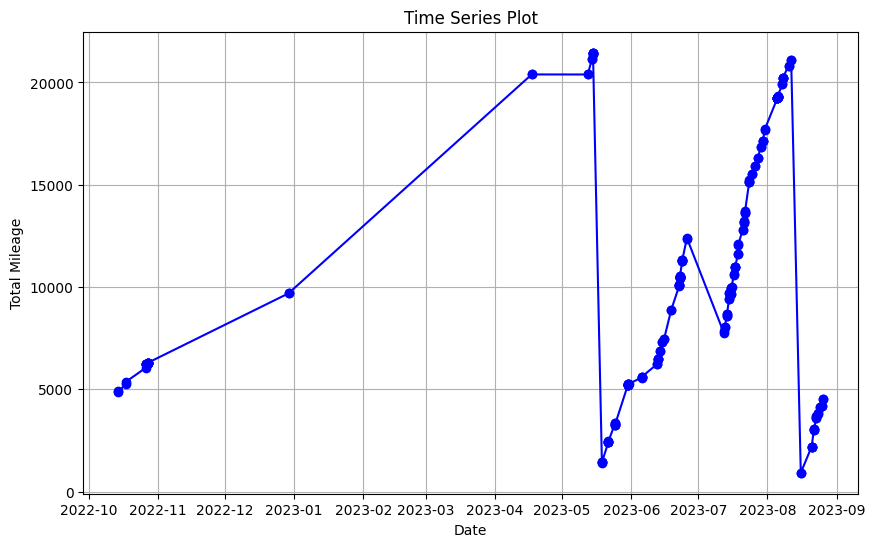

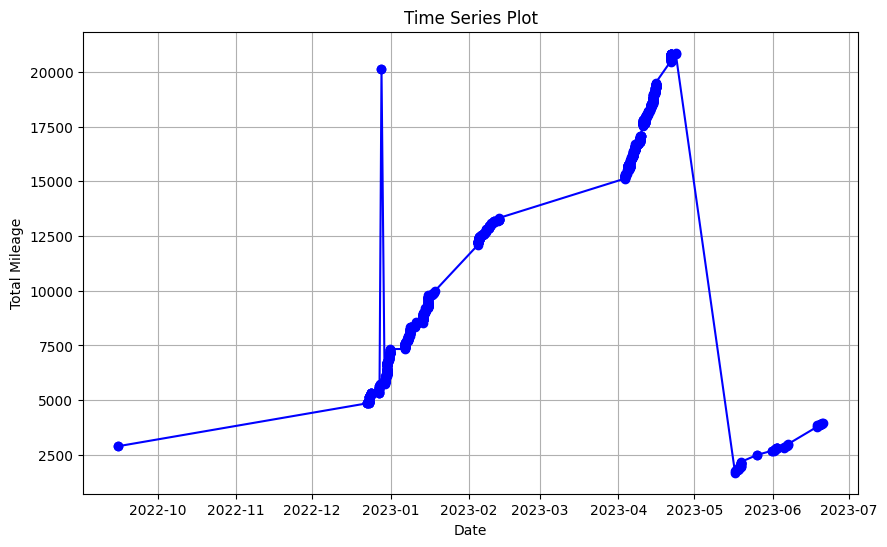

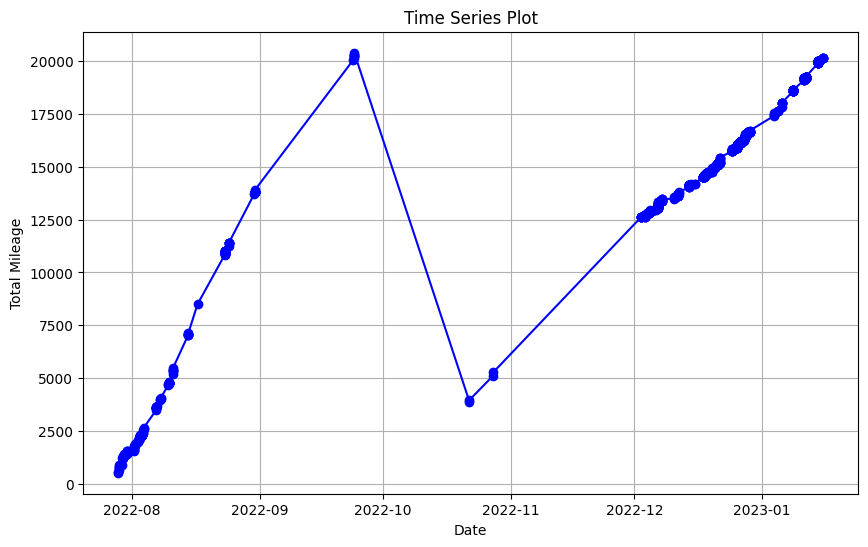

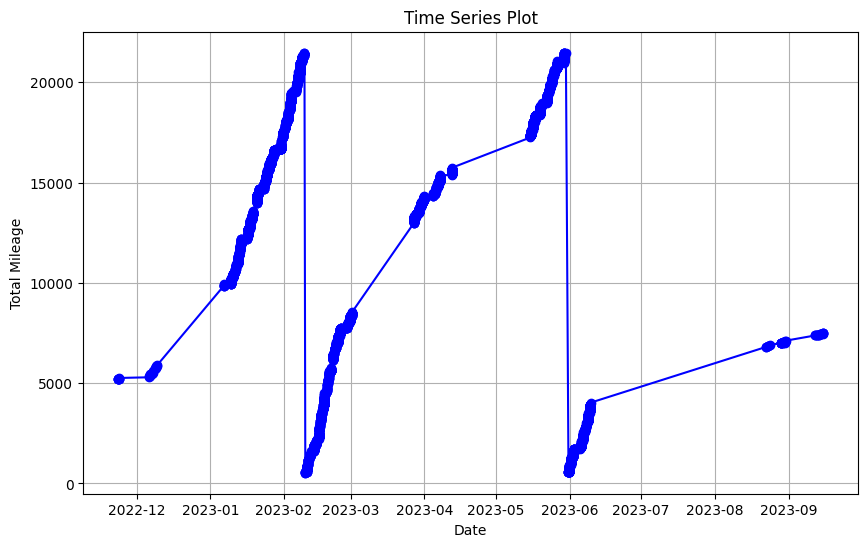

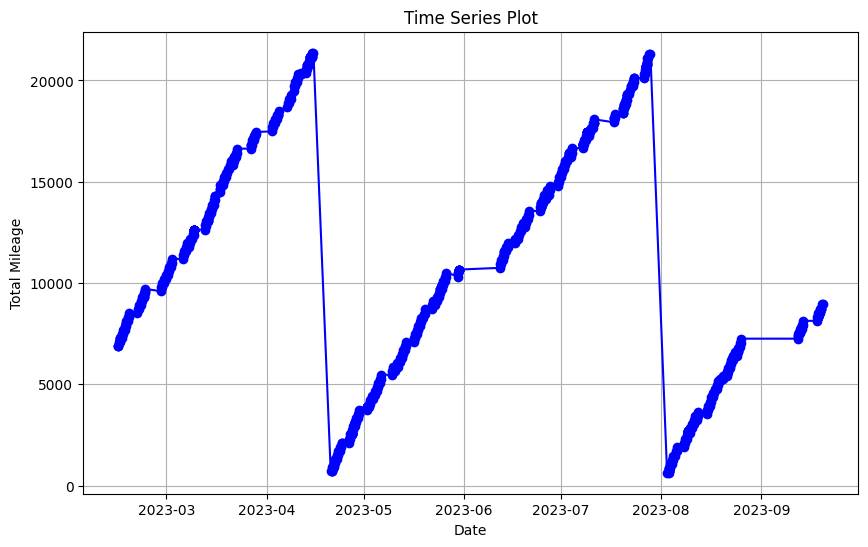

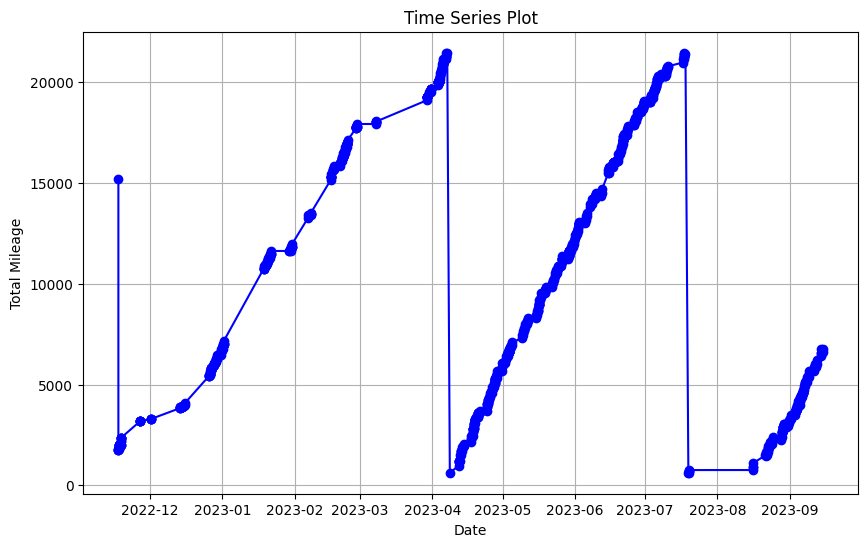

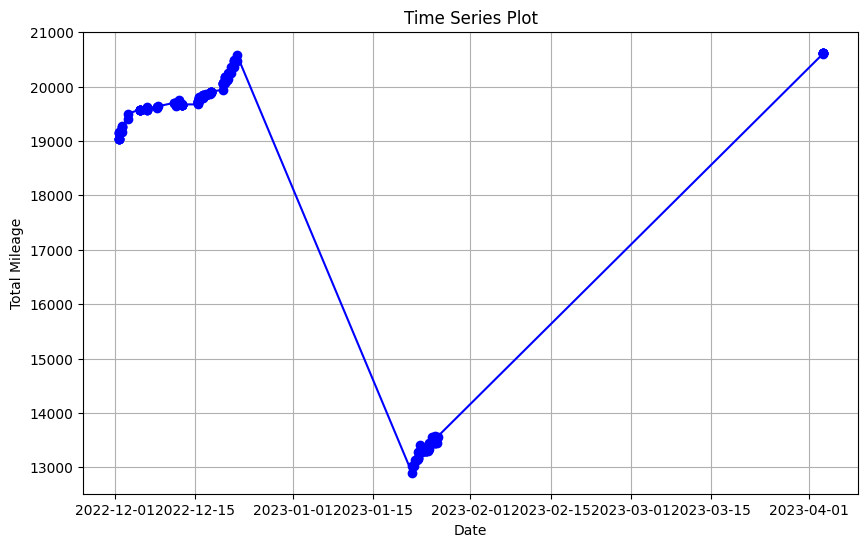

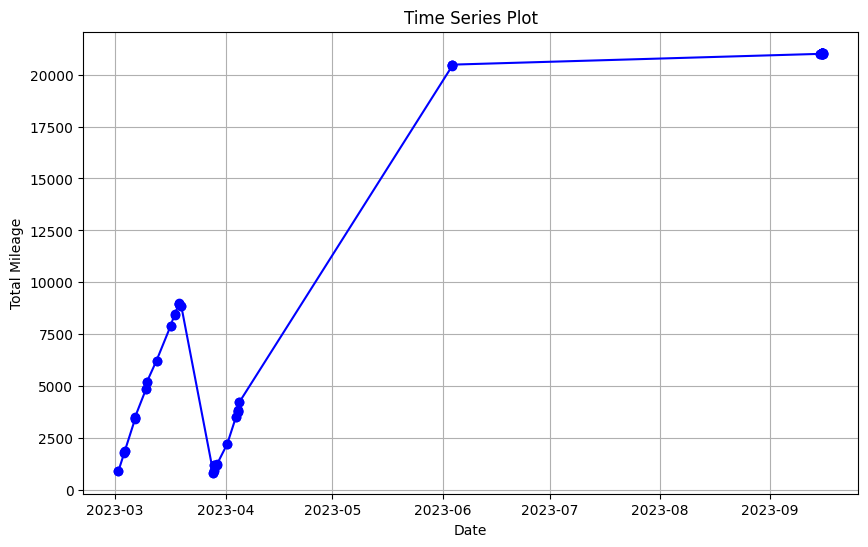

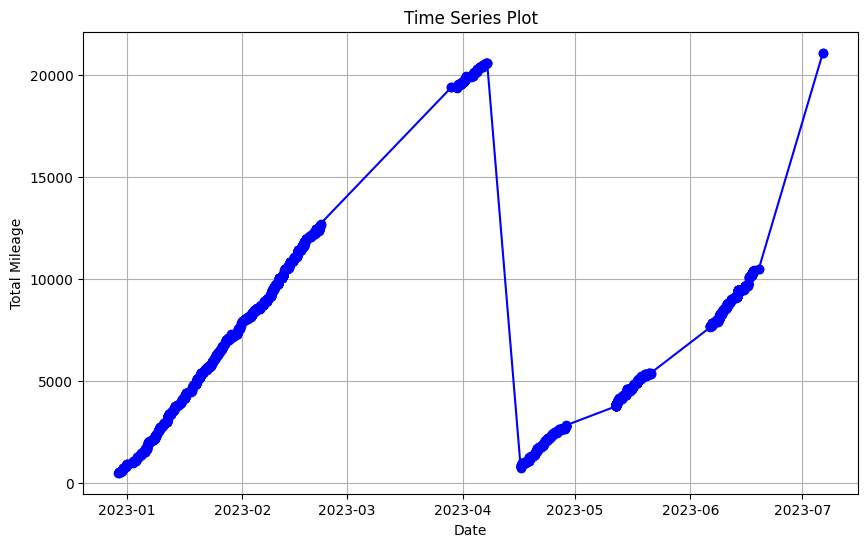

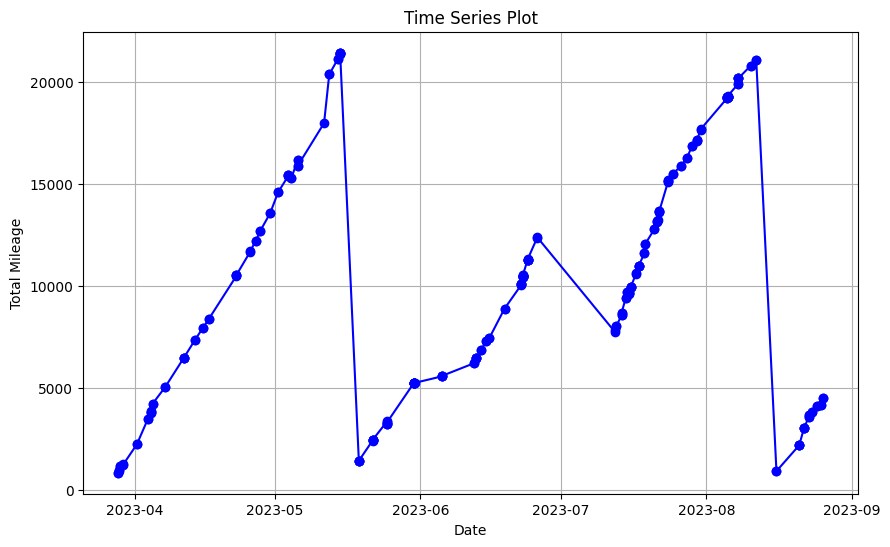

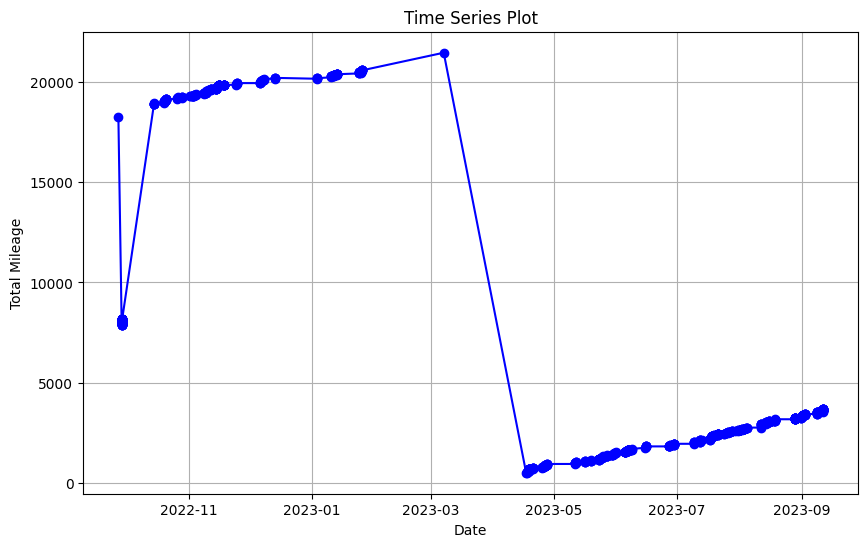

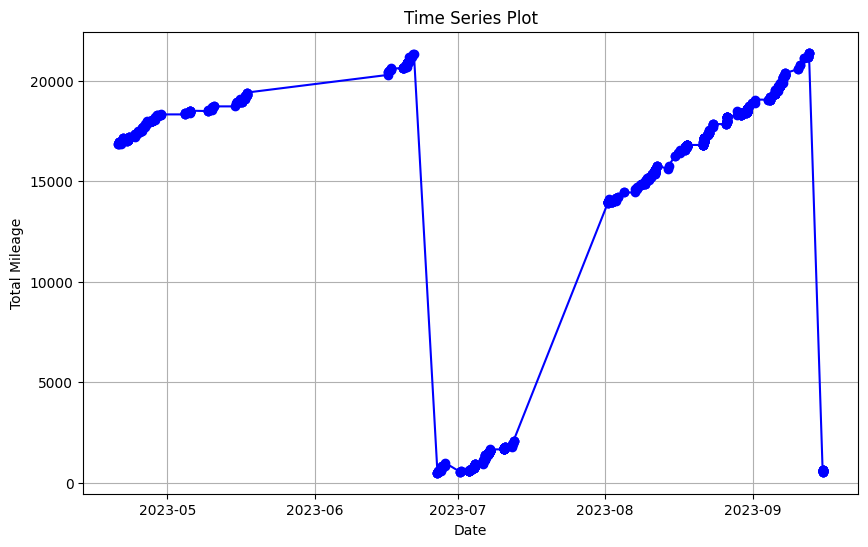

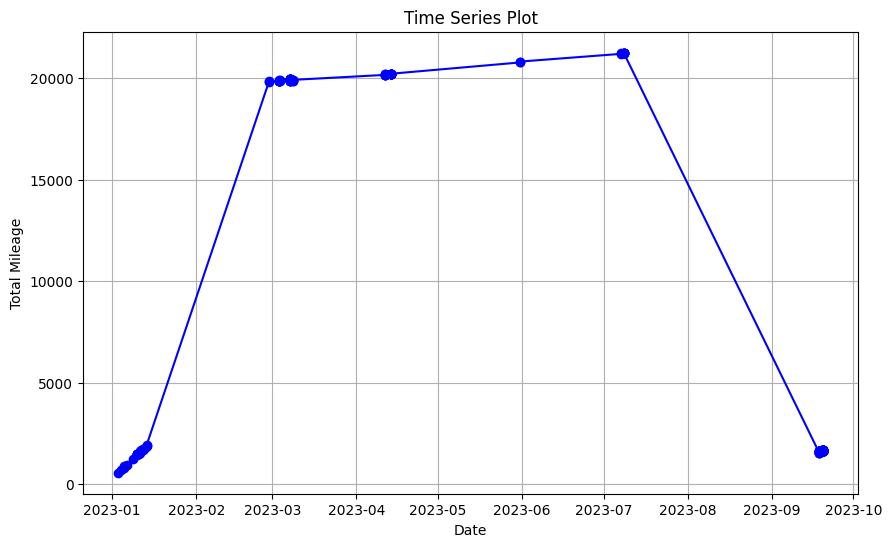

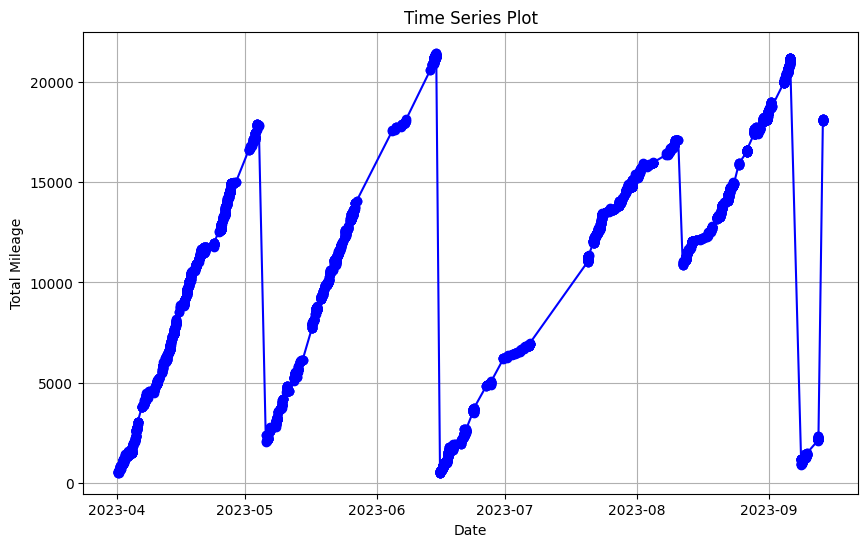

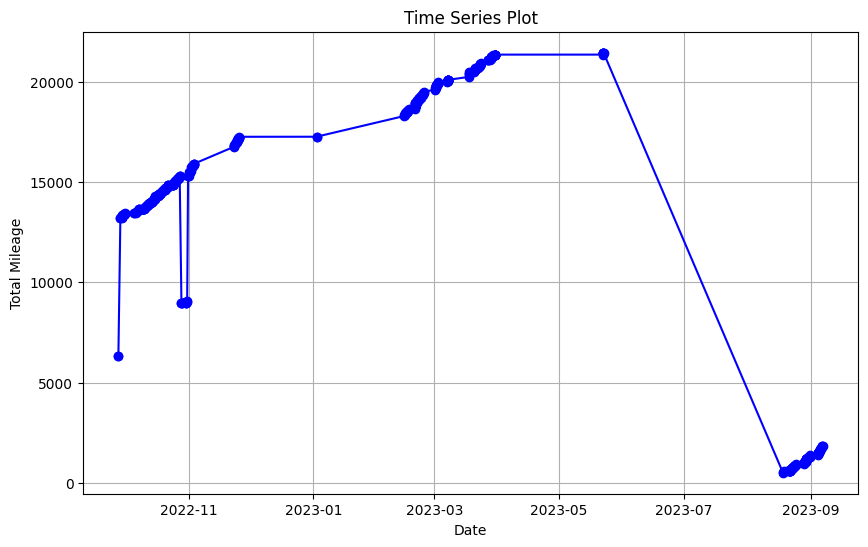

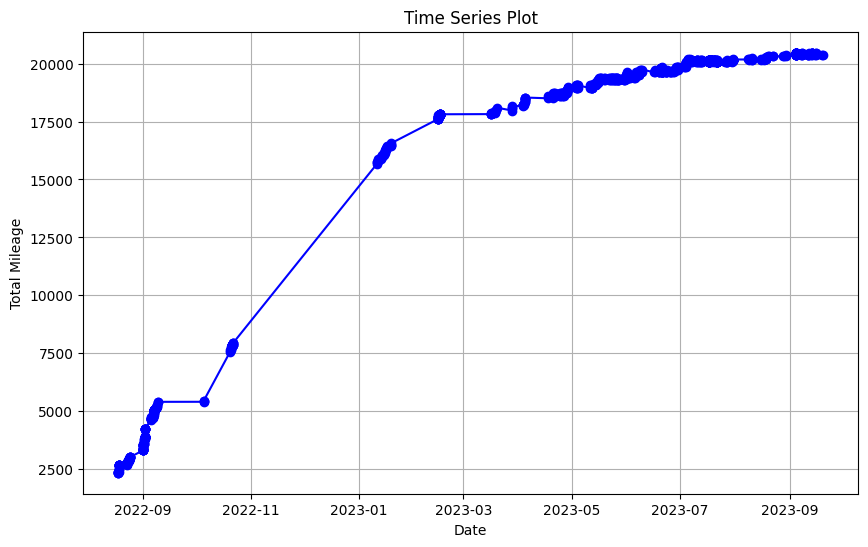

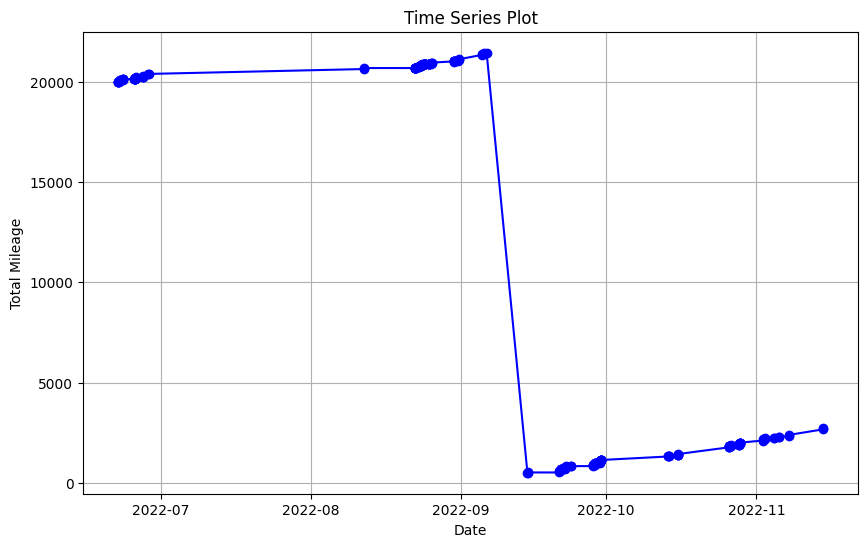

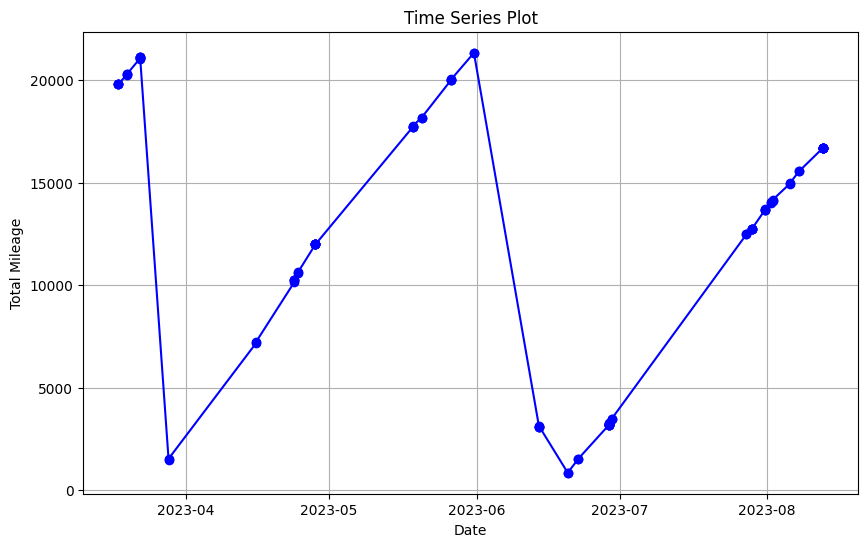

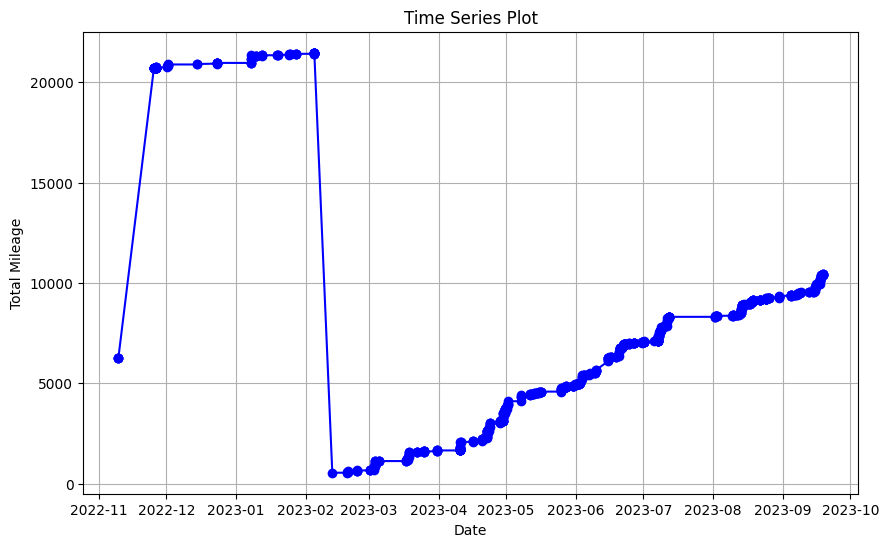

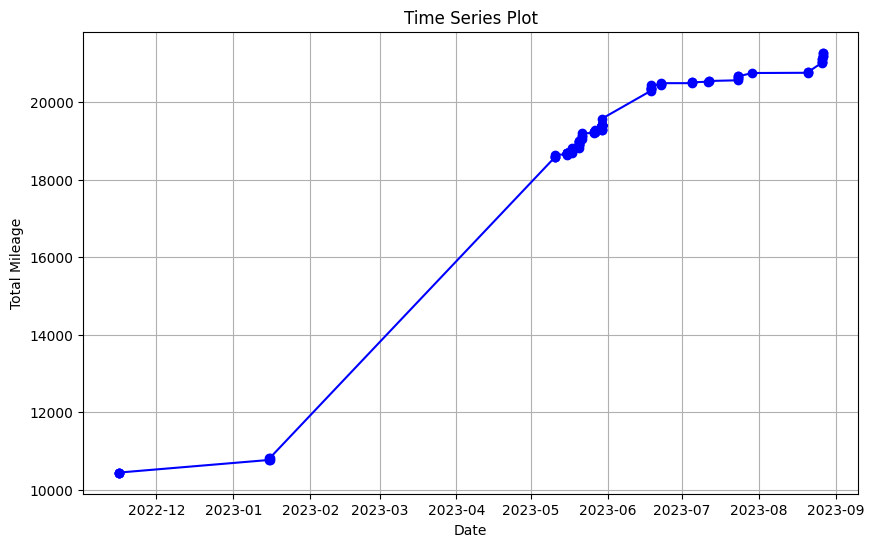

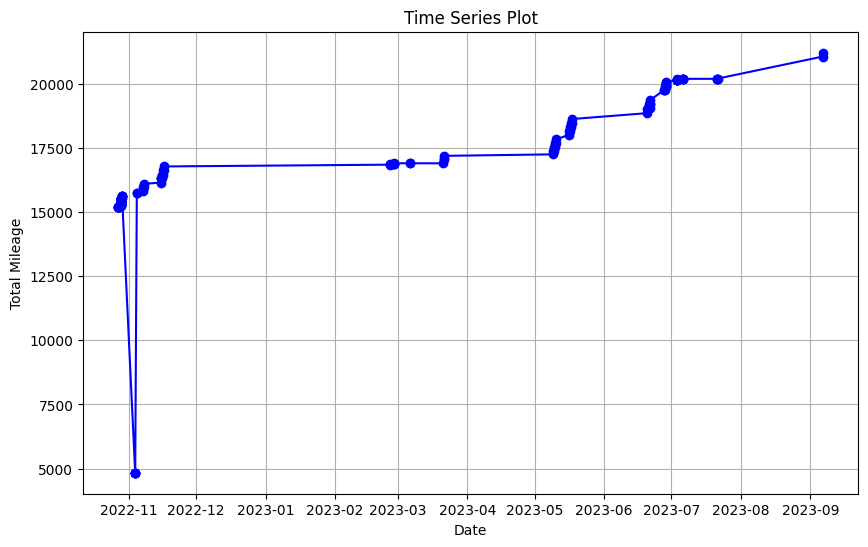

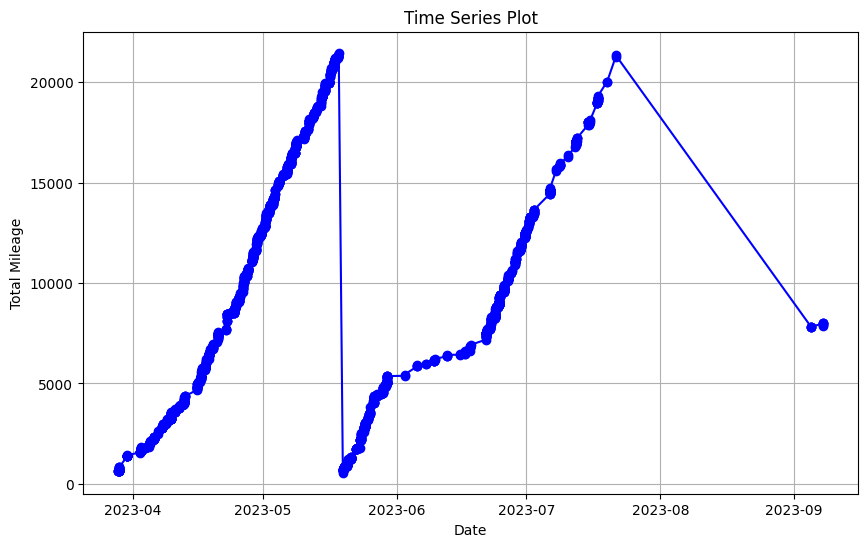

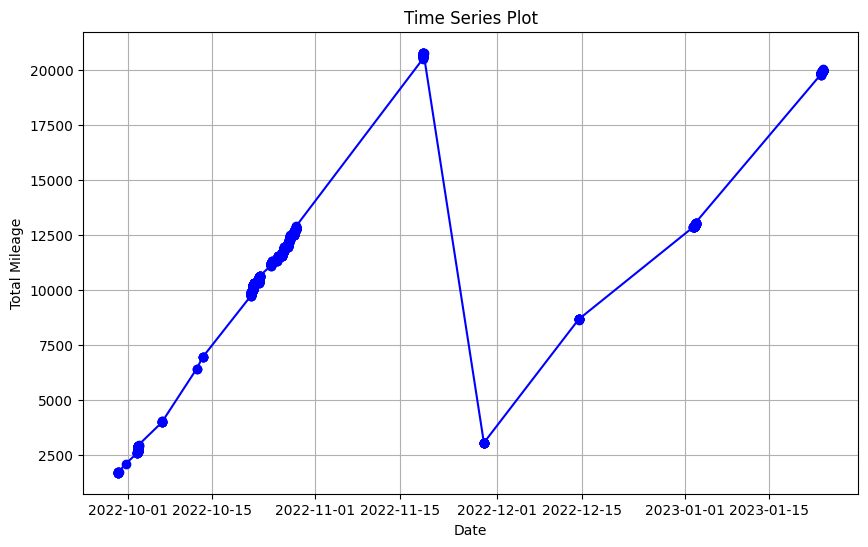

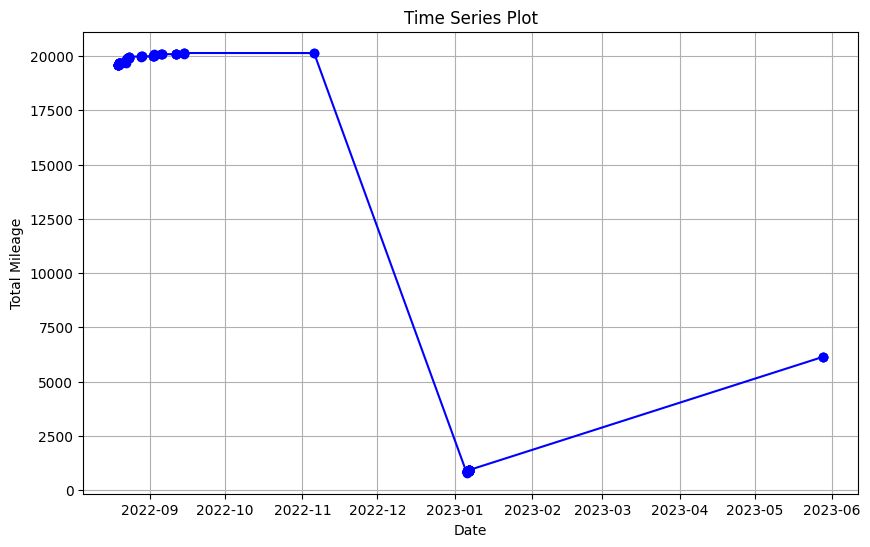

In [126]:
for vehicle in vehicles2:
  df_interim = df3[df3['vehicle_id'] == vehicle]

  # plot mileage vs time:a
  df_interim.set_index('occurred_at_time', inplace=True)
  plt.figure(figsize=(10, 6))
  plt.plot(df_interim.index, df_interim['total_mileage'], marker='o', linestyle='-', color='b')
  plt.title('Time Series Plot')
  plt.xlabel('Date')
  plt.ylabel('Total Mileage')
  plt.grid(True)
  plt.show()


In [ ]:
average_unique_users = df3.groupby('vehicle_id')['user_id'].nunique().mean()
average_unique_users

1.715362177929023

In [ ]:
df3.columns

Index(['vehicle_id', 'user_id', 'total_mileage', 'versions_mc_firmware',
       'occurred_at_time', 'app_version', 'assist_level', 'battery_cells',
       'battery_error_state', 'battery_serial_number',
       'battery_state_battery_soc', 'battery_state_battery_soh',
       'battery_state_cell_temp_1', 'battery_state_cell_temp_2',
       'battery_state_chg_temp', 'battery_state_dsg_temp',
       'battery_state_full_capacity', 'battery_state_pack_voltage',
       'battery_state_pre_start_temp', 'battery_state_real_time_current',
       'battery_state_remaining_capacity', 'dance_area', 'event',
       'hmi_serial_number', 'os_name', 'remaining_mileage',
       'versions_battery_firmware', 'versions_hmi_firmware',
       'versions_hmi_hardware', 'ValueCount', 'DateDifference'],
      dtype='object')

<ipython-input-20-43776859b7cb>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20', len(unique_group_types))
<ipython-input-20-43776859b7cb>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20', len(unique_group_types))


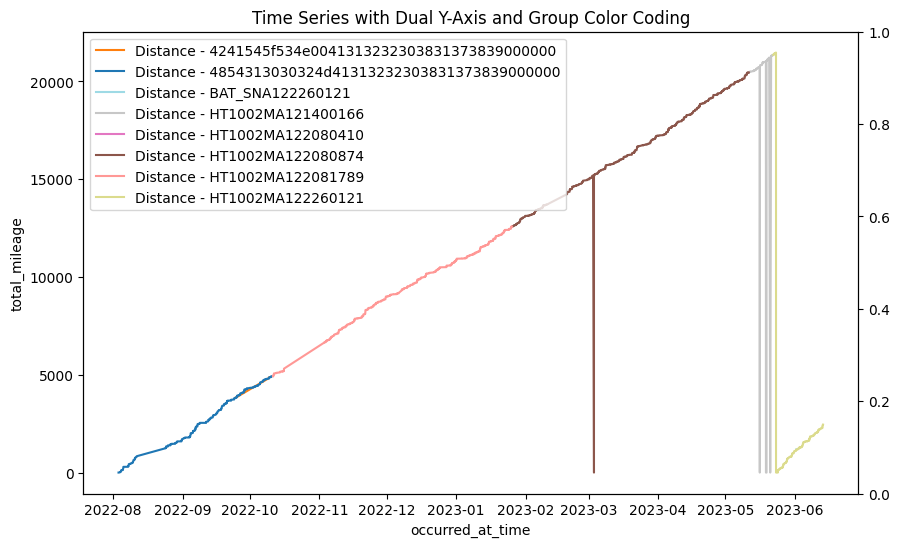

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Sample DataFrame
df = df[df['vehicle_id'] == '382d4727-6119-4391-adc0-ac5500c489b6']


# Create a figure and two subplots sharing the same x-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Get unique values in the 'group_type' column
unique_group_types = df['battery_serial_number'].unique()

# Generate a color map based on the number of unique values
cmap = get_cmap('tab20', len(unique_group_types))

# Generate a color map based on the number of unique values
cmap = get_cmap('tab20', len(unique_group_types))

# Create a color mapping dictionary
color_map = {group_type: cmap(i) for i, group_type in enumerate(unique_group_types)}

for group_type, group_df in df.groupby('battery_serial_number'):
    ax1.plot(group_df['occurred_at_time'], group_df['total_mileage'], color=color_map[group_type], label=f'Distance - {group_type}')


ax1.set_xlabel('occurred_at_time')
ax1.set_ylabel('total_mileage')
ax1.tick_params(axis='y')

# Create a twin y-axis on the right side
ax2 = ax1.twinx()

# # Plot the 'money' data on the right y-axis (ax2) with color mapping
# for group_type, group_df in df.groupby('group_type'):
#     ax2.plot(group_df['date'], group_df['money'], color=color_map[group_type], label=f'Money - {group_type}')

# ax2.set_ylabel('Money')
# ax2.tick_params(axis='y')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines , labels, loc='upper left')

# Show the plot
plt.title('Time Series with Dual Y-Axis and Group Color Coding')
plt.show()


In [ ]:
df['battery_serial_number'].drop_duplicates()

833109     4854313030324d41313232303831373839000000
895774     4241545f534e0041313232303831373839000000
812517                                          NaN
1386119                           HT1002MA122081789
2387855                           HT1002MA122080874
1204978                           HT1002MA122080410
23627                             HT1002MA121400166
1534757                           HT1002MA122260121
670114                             BAT_SNA122260121
Name: battery_serial_number, dtype: object

**Plots for some examplary 🚴:**



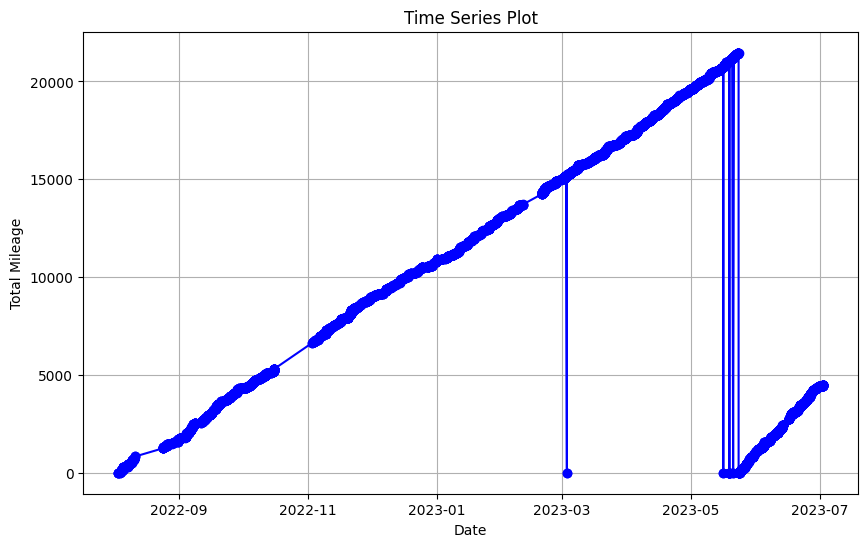

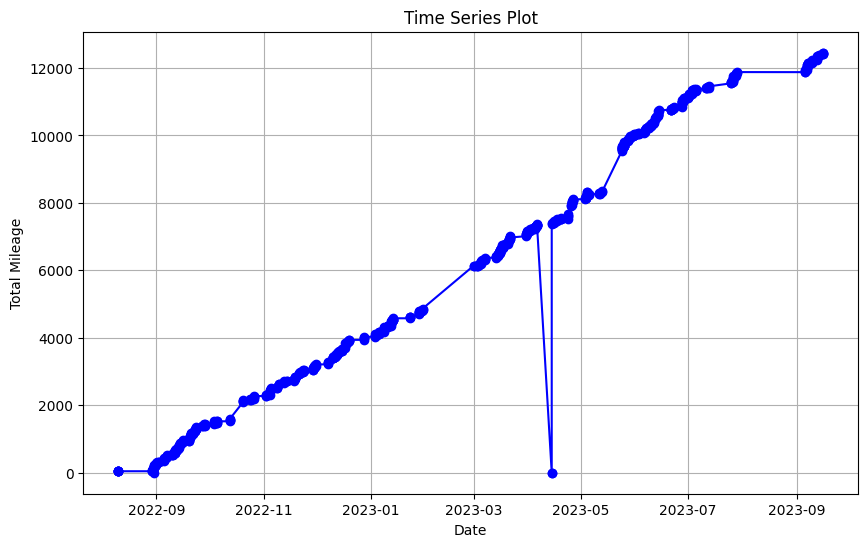

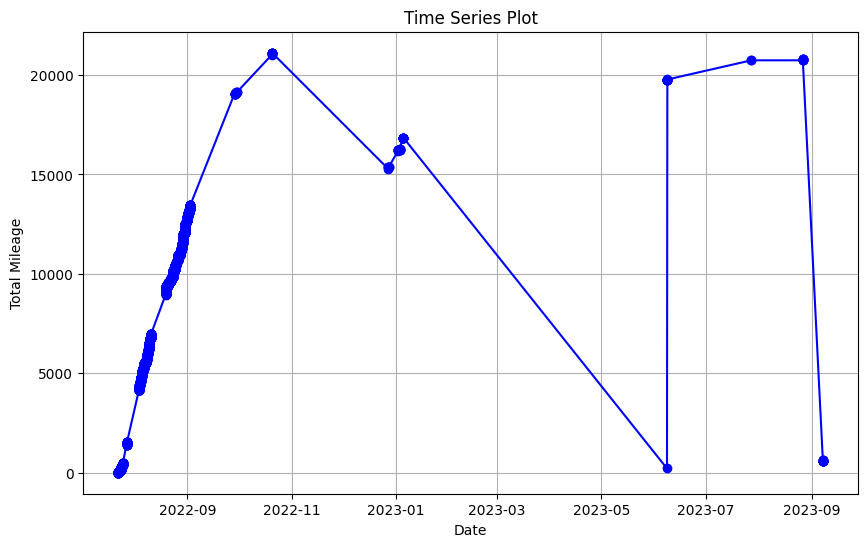

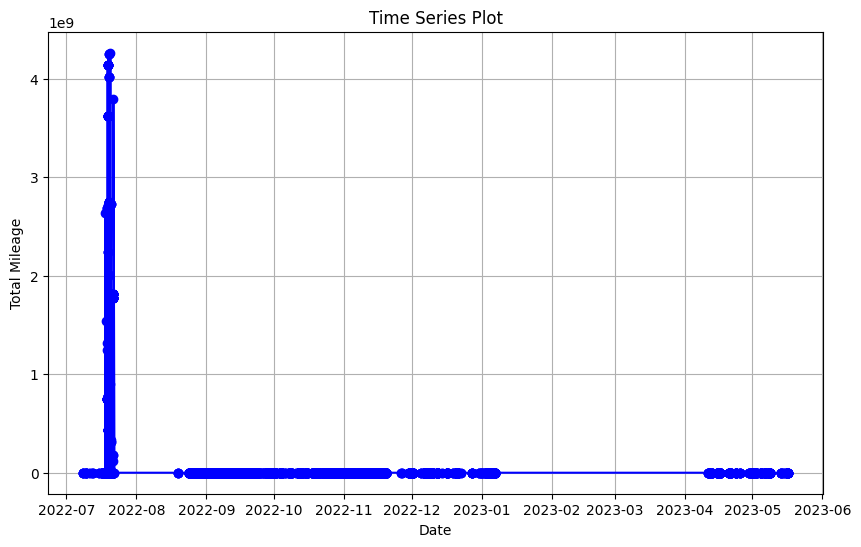

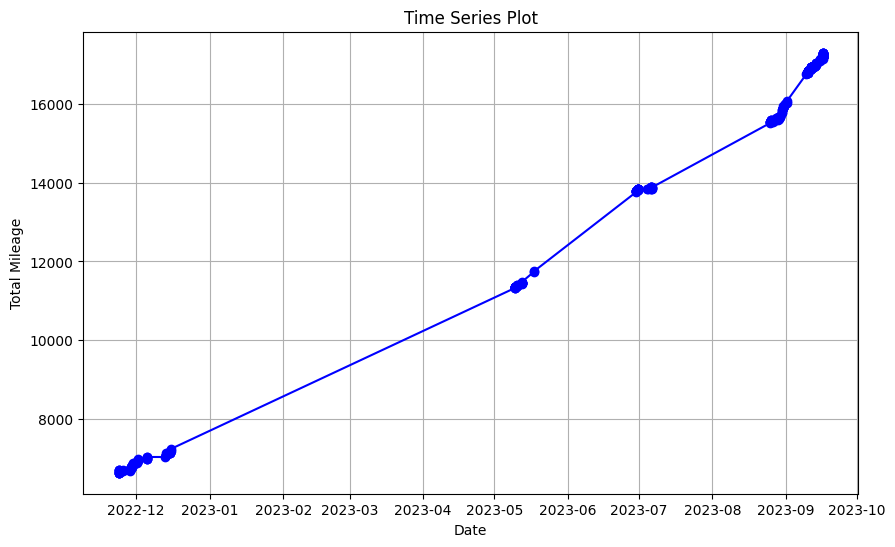

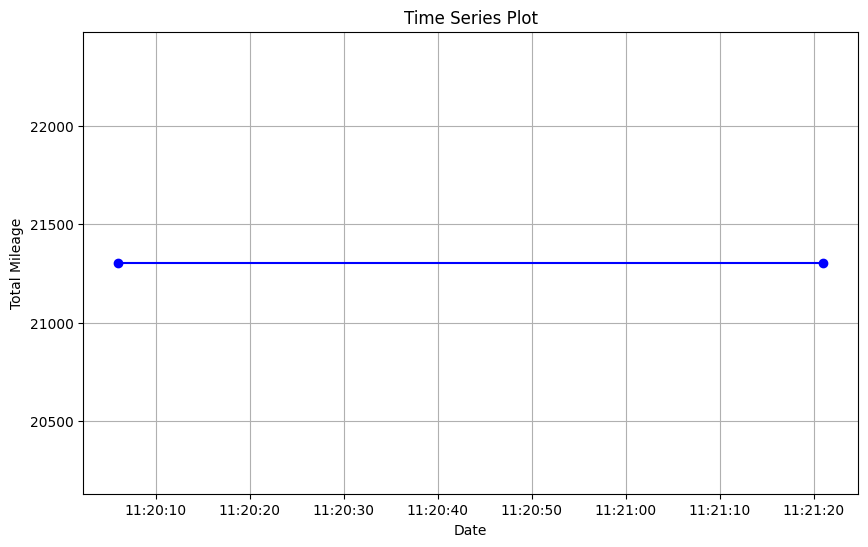

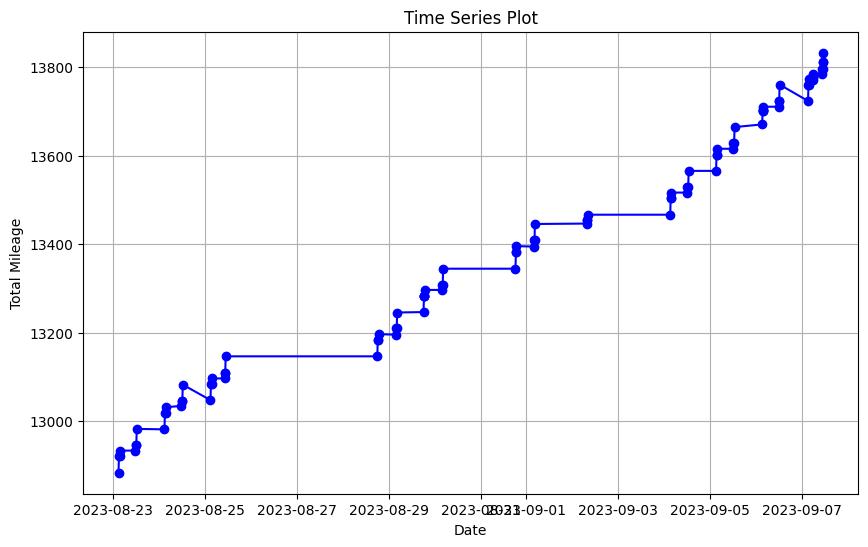

In [ ]:
# vehicles
vehicles = ['382d4727-6119-4391-adc0-ac5500c489b6',
            'bc3412f7-37a8-4676-8043-53f4a1bb316a',
            'ca4c5d0d-0d08-4189-b8ee-e8cd4d337422',
            '4cf2b02f-5631-4441-a93d-a1f2d59c83bf',
            '00e10c80-c79a-4e5e-b5ee-73de58bb7091',
            '010df9b5-ecea-445a-9cc5-01fa71edcce3',
            '00c8acbf-39fe-44dc-bdc5-257e189c4a58'
            ]

for vehicle in vehicles:
  df_interim = df[df['vehicle_id'] == vehicle]

  # plot mileage vs time:a
  df_interim.set_index('occurred_at_time', inplace=True)
  plt.figure(figsize=(10, 6))
  plt.plot(df_interim.index, df_interim['total_mileage'], marker='o', linestyle='-', color='b')
  plt.title('Time Series Plot')
  plt.xlabel('Date')
  plt.ylabel('Total Mileage')
  plt.grid(True)
  plt.show()

In [ ]:
# based on above observation, it seems that there is a reset after total mileage of around 22000 (2200 km)
# TODO: filter out everything above 30000 km to avoid massive outliers in mileage
# TODO: in the first two graphs you see some random outliers with 0, try to find a way to filter them out
# TODO: for our analysis, we should not have this reset to 0 after 2200 km, as it seems like there is e.g. a new battery.
#       Ideally, we find a way that the time series keeps increasing and the values are basically added up. E.g. for the first graph after June '23
#       the values should keep increasing and not restart from 0.
#       Keep in mind that those resets happen several times, so we should find a smart solution here.